### Student Information
Name: 陳俊任

Student ID: 114062591

GitHub ID: ArnoldChen0601

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

---

### Phase 1

### Outline

This notebook follows the data mining process from the Master notebook, adapted for the Reddit Stock Sentiment dataset.

1. **Setup and Import Libraries**
2. **Data Source**
3. **Data Preparation**
4. **Data Transformation**
5. **Data Mining using Pandas**
- 5.1 Missing Values Analysis
- 5.2 Duplicate Data Handling
6. **Data Preprocessing**
- 6.1 Sampling and Distribution Analysis
- 6.2 Feature Creation
- 6.3 Feature Subset Selection
- 6.4 Text Tokenization
- 6.5 Text Vectorization (Document-Term Matrix)
- 6.6 Term Frequency Analysis
- 6.7 Term-Document Matrix Visualization
7. **Data Visualizations**
- 7.1 Sentiment Distribution
- 7.2 Top Frequent Terms
- 7.3 Text Length by Sentiment
- 7.4 Sentiment by Subreddit
- 7.5 Correlation Heatmap
- 7.6 Time Series Analysis
- 7.7 Word Count Distribution

### 1. Setup and Import Libraries

### Data Quality Note

**Important:** The Reddit-stock-sentiment.csv dataset contains two target label columns (`sentiment` and `label`) that may have inconsistent values in some rows. This reflects real-world data quality issues. For this analysis, we use the `label` column as the primary target variable for consistency.

In [93]:
# Import necessary libraries
import pandas as pd
import numpy as np
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Download tokenizer model (punkt) and stopword list for text preprocessing
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)

print("Libraries imported successfully!")

Libraries imported successfully!


### 2. Data Source

The dataset contains Reddit posts and comments about stock market sentiment with 16 columns. For this analysis, we focus on the 'text' and 'label' columns. The sentiment labels are:
- 1: Positive
- 0: Neutral  
- -1: Negative

### 3. Data Preparation

Load the Reddit stock sentiment dataset and display basic information.

In [94]:
# Load the dataset
reddit_df = pd.read_csv('newdataset/Reddit-stock-sentiment.csv')

# Display basic information
print(f"Dataset shape: {reddit_df.shape}")
print(f"\nColumns: {list(reddit_df.columns)}")
print(f"\nFirst few rows:")
reddit_df.head()

Dataset shape: (847, 16)

Columns: ['type', 'datetime', 'post_id', 'subreddit', 'title', 'author', 'url', 'upvotes', 'downvotes', 'upvote_ratio', 'text', 'subjectivity', 'polarity', 'sentiment', 'entities', 'label']

First few rows:


,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
4,comment,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/tr...,1,NaN,NaN,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0


In [95]:
# Check for inconsistencies between 'label' and 'sentiment' columns
inconsistent_rows = reddit_df[reddit_df['label'] != reddit_df['sentiment']]
print(f"Number of inconsistent rows between 'label' and 'sentiment': {len(inconsistent_rows)}")
print(f"Percentage of inconsistencies: {len(inconsistent_rows)/len(reddit_df)*100:.2f}%")

if len(inconsistent_rows) > 0:
    print("\nSample of inconsistent rows:")
    print(inconsistent_rows[['text', 'label', 'sentiment']].head())

Number of inconsistent rows between 'label' and 'sentiment': 458
Percentage of inconsistencies: 54.07%

Sample of inconsistent rows:
                                                text  label  sentiment
1  Stunt as in like why did they even make a big ...    0.0        1.0
4                           He didn’t say thank you.   -1.0        0.0
5  Hoping to ejaculate in wet warm puss tonight, ...    0.0        1.0
7  Confirmed not a trap. Its been like this for p...    0.0        1.0
9  HLGN is $10. Hurry and catch it now before it ...    1.0        0.0


### 4. Data Transformation

Convert data into a suitable format by selecting relevant columns and creating readable sentiment categories.

In [96]:
# Select relevant columns for analysis
X_reddit = reddit_df[['text', 'label', 'sentiment', 'subreddit', 'datetime', 'upvotes']].copy()

# Add a readable sentiment category
label_mapping = {1.0: 'positive', 0.0: 'neutral', -1.0: 'negative'}
X_reddit['sentiment_category'] = X_reddit['label'].map(label_mapping)

# Display the transformed dataframe
print(f"Simplified dataset shape: {X_reddit.shape}")
X_reddit.head(10)

Simplified dataset shape: (847, 7)


,text,label,sentiment,subreddit,datetime,upvotes,sentiment_category
0,Calls on retards,-1.0,-1.0,wallstreetbets,2025-04-11 17:29:56,0,negative
1,Stunt as in like why did they even make a big ...,0.0,1.0,wallstreetbets,2025-04-12 1:12:19,-15,neutral
2,Seeing lots of red in the ticker.,0.0,0.0,StockMarket,2025-04-10 15:09:41,1,neutral
3,Vision Marine Technologies Inc. is rewriting t...,1.0,1.0,stockstobuytoday,2023-08-30 17:12:55,30,positive
4,He didn’t say thank you.,-1.0,0.0,StockMarket,2025-04-11 14:48:05,1,negative
5,"Hoping to ejaculate in wet warm puss tonight, ...",0.0,1.0,wallstreetbets,2025-04-12 2:19:03,16,neutral
6,Trump will respond to china increasing their t...,-1.0,-1.0,stocks,2025-04-11 12:37:23,5,negative
7,Confirmed not a trap. Its been like this for p...,0.0,1.0,wallstreetbets,2025-04-11 17:28:50,-3,neutral
8,Am I the only one seeing the cup & handle brea...,1.0,1.0,stocks,2021-02-01 15:36:32,1,positive
9,HLGN is $10. Hurry and catch it now before it ...,1.0,0.0,stockstobuytoday,2021-12-31 16:29:49,2,positive


### 5. Data Mining using Pandas

#### 5.1 Missing Values Analysis

Missing values in original dataset (reddit_df):
type              0
datetime          0
post_id           0
subreddit         0
title             0
author            0
url               0
upvotes           0
downvotes       783
upvote_ratio    783
text              0
subjectivity      0
polarity          0
sentiment         0
entities          0
label             0
dtype: int64


Percentage of missing values in original dataset:
downvotes       92.44392
upvote_ratio    92.44392
dtype: float64


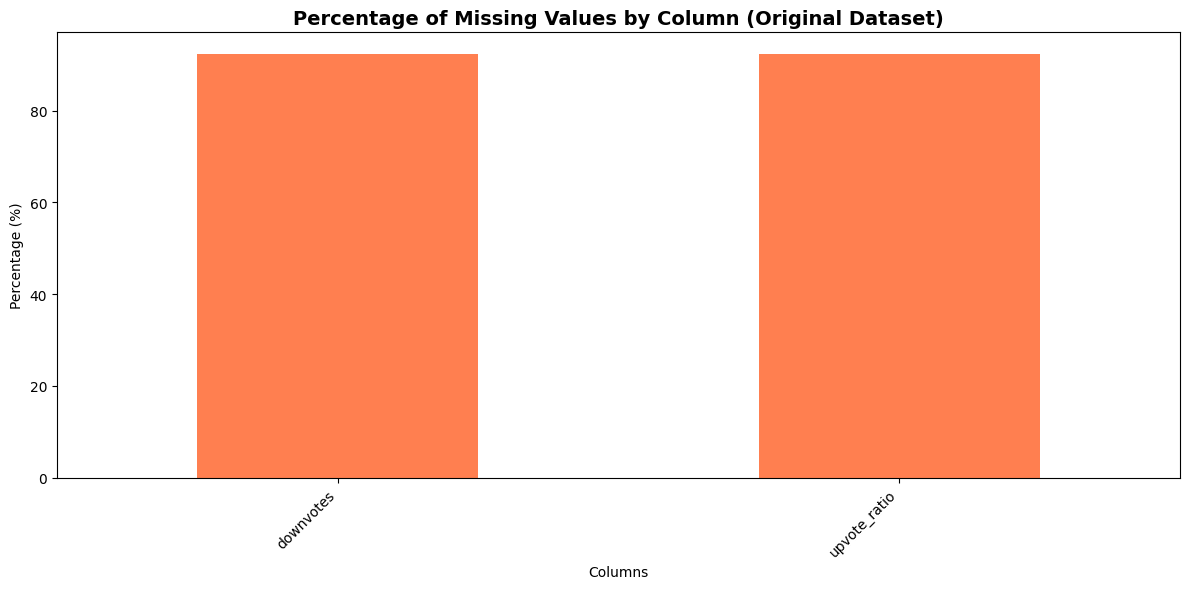


Missing values in selected columns (X_reddit):
text                  0
label                 0
sentiment             0
subreddit             0
datetime              0
upvotes               0
sentiment_category    0
dtype: int64

Note: Selected columns have been filtered and may have fewer missing values.


In [97]:
# Check for missing values in the ORIGINAL dataset
print("Missing values in original dataset (reddit_df):")
print(reddit_df.isnull().sum())
print("\n")

# Calculate percentage of missing values
missing_percentage_original = (reddit_df.isnull().sum() / len(reddit_df)) * 100
print("Percentage of missing values in original dataset:")
print(missing_percentage_original[missing_percentage_original > 0])  # Show only columns with missing values

# Visualize missing values
plt.figure(figsize=(12, 6))
missing_percentage_original[missing_percentage_original > 0].plot(kind='bar', color='coral')
plt.title('Percentage of Missing Values by Column (Original Dataset)', fontsize=14, fontweight='bold')
plt.ylabel('Percentage (%)')
plt.xlabel('Columns')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Check the selected columns
print("\n" + "="* 50)
print("Missing values in selected columns (X_reddit):")
print(X_reddit.isnull().sum())
print(f"\nNote: Selected columns have been filtered and may have fewer missing values.")

**Key Finding:** The original dataset contains 92.44% missing values in `downvotes` (783/847 rows) and `upvote_ratio` (783/847 rows). By strategically selecting only relevant columns (`text`, `label`, `sentiment`, `subreddit`, `datetime`, `upvotes`), we avoid these missing value issues. The selected columns have 0 missing values in X_reddit.

In [98]:
# Handle missing values - drop rows with missing text or label
X_reddit_clean = X_reddit.dropna(subset=['text', 'label']).copy()

# Fill missing upvotes with 0 (assuming no upvotes means 0)
X_reddit_clean['upvotes'] = X_reddit_clean['upvotes'].fillna(0)

print(f"Original dataset size: {len(X_reddit)}")
print(f"Cleaned dataset size: {len(X_reddit_clean)}")
print(f"Rows removed: {len(X_reddit) - len(X_reddit_clean)}")

print("\n" + "="* 50)
print("Key Finding: No rows removed since selected columns")
print("(text, label) have no missing values. All 847 rows retained.")

Original dataset size: 847
Cleaned dataset size: 847
Rows removed: 0

Key Finding: No rows removed since selected columns
(text, label) have no missing values. All 847 rows retained.


#### 5.2 Dealing with Duplicate Data

In [99]:
# Check for duplicate text entries
print(f"Number of duplicate texts: {X_reddit_clean['text'].duplicated().sum()}")

# Remove duplicates based on text content
X_reddit_clean = X_reddit_clean.drop_duplicates(subset=['text'], keep='first')

print(f"Dataset size after removing duplicates: {len(X_reddit_clean)}")

Number of duplicate texts: 23
Dataset size after removing duplicates: 824


**Key Finding:** Removed 23 duplicate text entries (2.7% of the cleaned data), reducing the dataset from 847 to 824 unique records.

### 6. Data Preprocessing

#### 6.1 Sampling

Analyze the class distribution in the dataset.

In [100]:
# Display class distribution
print("Sentiment distribution:")
print(X_reddit_clean['sentiment_category'].value_counts())
print("\n")

# Create a balanced sample (optional - keeping all data for now)
# For demonstration, we'll work with the full cleaned dataset
X_reddit_sample = X_reddit_clean.copy()

print(f"Sample size: {len(X_reddit_sample)}")

Sentiment distribution:
sentiment_category
neutral     401
negative    315
positive    108
Name: count, dtype: int64


Sample size: 824


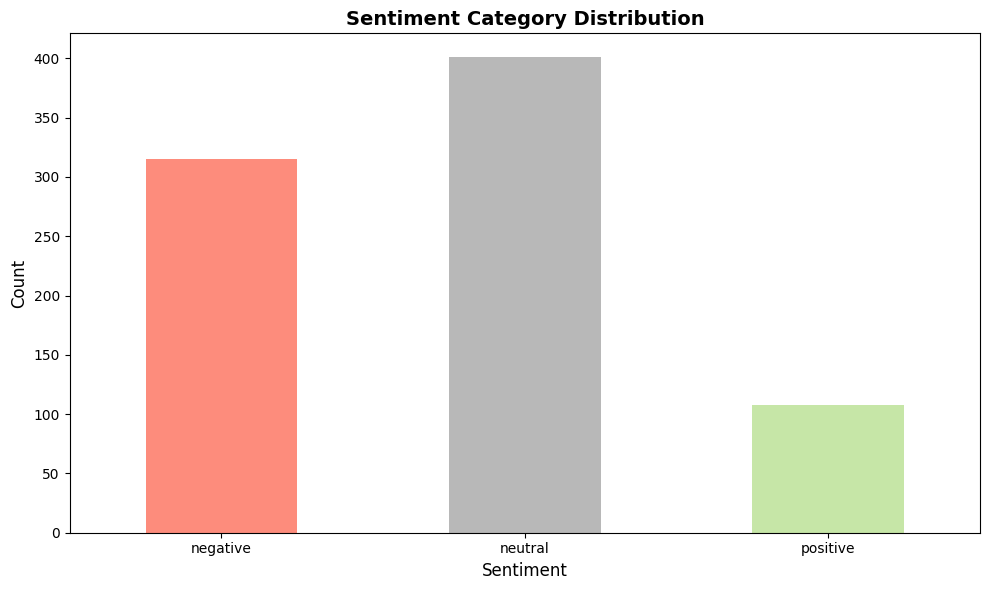

In [101]:
# Visualize sentiment distribution with bar chart
# Sort by sentiment category for consistent ordering
sentiment_order = ['negative', 'neutral', 'positive']
sentiment_colors = {'negative': '#FD8C7C', 'neutral': '#B8B8B8', 'positive': '#C6E6A7'}

sentiment_distribution = X_reddit_sample['sentiment_category'].value_counts()
sentiment_distribution = sentiment_distribution.reindex(sentiment_order)

plt.figure(figsize=(10, 6))
sentiment_distribution.plot(
    kind='bar',
    color=[sentiment_colors[cat] for cat in sentiment_order],
    rot=0
)
plt.title('Sentiment Category Distribution', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Sentiment', fontsize=12)
plt.tight_layout()
plt.show()

**Key Finding:** The dataset shows significant class imbalance with neutral sentiment being most common (401 posts, 48.7%), followed by negative (315 posts, 38.2%), and positive (108 posts, 13.1%). This 3.7:1 ratio between neutral and positive classes should be considered for classification tasks to avoid bias toward the majority class.

#### 6.2 Feature Creation

Create new features from existing data to better understand text characteristics.

In [102]:
# Create new features
X_reddit_sample['text_length'] = X_reddit_sample['text'].str.len()
X_reddit_sample['word_count'] = X_reddit_sample['text'].str.split().str.len()

# Display statistics of new features
print("Text length statistics:")
print(X_reddit_sample['text_length'].describe())
print("\nWord count statistics:")
print(X_reddit_sample['word_count'].describe())

print("\n" + "="* 50)
print("Key Finding: Posts are generally short with median text length")
print("of 79.5 characters and median word count of 14 words.")
print("The maximum values (2753 characters, 483 words) indicate")
print("occasional very long posts, but 75% of posts have ≤30 words.")

Text length statistics:
count     824.000000
mean      148.149272
std       240.916548
min         1.000000
25%        39.000000
50%        79.500000
75%       164.000000
max      2753.000000
Name: text_length, dtype: float64

Word count statistics:
count    824.000000
mean      25.766990
std       39.550685
min        1.000000
25%        7.000000
50%       14.000000
75%       30.000000
max      483.000000
Name: word_count, dtype: float64

Key Finding: Posts are generally short with median text length
of 79.5 characters and median word count of 14 words.
The maximum values (2753 characters, 483 words) indicate
occasional very long posts, but 75% of posts have ≤30 words.
count    824.000000
mean      25.766990
std       39.550685
min        1.000000
25%        7.000000
50%       14.000000
75%       30.000000
max      483.000000
Name: word_count, dtype: float64

Key Finding: Posts are generally short with median text length
of 79.5 characters and median word count of 14 words.
The maximu

#### 6.3 Feature Subset Selection

Display the selected features for analysis.

In [103]:
# Display selected features
print("Selected features for analysis:")
print(X_reddit_sample.columns.tolist())
print("\n")
print("Sample of processed data:")
X_reddit_sample[['text', 'sentiment_category', 'text_length', 'word_count']].head()

Selected features for analysis:
['text', 'label', 'sentiment', 'subreddit', 'datetime', 'upvotes', 'sentiment_category', 'text_length', 'word_count']


Sample of processed data:


,text,sentiment_category,text_length,word_count
0,Calls on retards,negative,16,3
1,Stunt as in like why did they even make a big ...,neutral,137,27
2,Seeing lots of red in the ticker.,neutral,33,7
3,Vision Marine Technologies Inc. is rewriting t...,positive,1079,159
4,He didn’t say thank you.,negative,24,5


#### 6.4 Text Tokenization

Before vectorization, let's explore tokenization by extracting unigrams (individual words) from sample texts.

In [104]:
# Tokenize sample texts using NLTK
from nltk.tokenize import word_tokenize

# Show tokenization examples
sample_texts = X_reddit_sample['text'].head(3)
print("Tokenization Examples:\n")
for idx, text in enumerate(sample_texts):
    tokens = word_tokenize(str(text).lower())
    print(f"Sample {idx+1}:")
    print(f"Original: {text[:100]}...")
    print(f"Tokens: {tokens[:15]}")  # Show first 15 tokens
    print()

Tokenization Examples:

Sample 1:
Original: Calls on retards...
Tokens: ['calls', 'on', 'retards']

Sample 2:
Original: Stunt as in like why did they even make a big deal about starting it in the first place? No company ...
Tokens: ['stunt', 'as', 'in', 'like', 'why', 'did', 'they', 'even', 'make', 'a', 'big', 'deal', 'about', 'starting', 'it']

Sample 3:
Original: Seeing lots of red in the ticker....
Tokens: ['seeing', 'lots', 'of', 'red', 'in', 'the', 'ticker', '.']



#### 6.5 Attribute Transformation - Text Vectorization

Transform text data into numerical features using CountVectorizer to create a document-term matrix.

In [105]:
# Text tokenization and vectorization using CountVectorizer
from nltk.corpus import stopwords

# Get English stopwords
stop_words = stopwords.words('english')

# Create CountVectorizer
count_vect_reddit = CountVectorizer(
    max_features=1000,  # Limit to top 1000 features
    stop_words=stop_words,
    lowercase=True,
    min_df=2  # Minimum document frequency
)

# Fit and transform the text data
X_counts_reddit = count_vect_reddit.fit_transform(X_reddit_sample['text'])

print(f"Shape of count matrix: {X_counts_reddit.shape}")
print(f"Number of features (vocabulary): {len(count_vect_reddit.vocabulary_)}")

print("\n" + "="* 50)
print("Key Finding: Successfully transformed 824 text documents into")
print("a sparse matrix of shape (824, 1000), where each row represents")
print("a document and each column represents one of the 1000 most")
print("frequent terms (excluding stopwords, min_df=2).")

Shape of count matrix: (824, 1000)
Number of features (vocabulary): 1000

Key Finding: Successfully transformed 824 text documents into
a sparse matrix of shape (824, 1000), where each row represents
a document and each column represents one of the 1000 most
frequent terms (excluding stopwords, min_df=2).


In [106]:
# Examine the built-in analyzer from CountVectorizer
analyze = count_vect_reddit.build_analyzer()

# Test the analyzer on a sample sentence
sample_sentence = "I think the stock market will go up tomorrow"
print("Testing analyzer on sample sentence:")
print(f"Original: {sample_sentence}")
print(f"Analyzed: {analyze(sample_sentence)}")
print("\nThe analyzer tokenizes text, removes stopwords, and converts to lowercase.")

Testing analyzer on sample sentence:
Original: I think the stock market will go up tomorrow
Analyzed: ['think', 'stock', 'market', 'go', 'tomorrow']

The analyzer tokenizes text, removes stopwords, and converts to lowercase.


In [107]:
# Analyze term frequencies
term_frequencies_reddit = np.asarray(X_counts_reddit.sum(axis=0)).flatten()

# Get top terms
top_n = 20
sorted_idx = np.argsort(term_frequencies_reddit)[::-1][:top_n]
top_terms = np.array(count_vect_reddit.get_feature_names_out())[sorted_idx]
top_freqs = term_frequencies_reddit[sorted_idx]

print(f"Top {top_n} most frequent terms:")
for term, freq in zip(top_terms, top_freqs):
    print(f"{term}: {freq}")

Top 20 most frequent terms:
us: 96
trump: 92
like: 83
market: 82
china: 72
even: 52
think: 52
one: 51
people: 51
going: 50
money: 46
good: 46
would: 45
see: 40
tariffs: 39
get: 37
time: 36
make: 36
want: 35
stock: 34


In [108]:
# Visualize a sample of the term-document matrix
print("Sample of term-document matrix (first 5 documents, first 10 terms):")
print(X_counts_reddit[:5, :10].toarray())
print("\nSample terms:")
print(count_vect_reddit.get_feature_names_out()[:10])

Sample of term-document matrix (first 5 documents, first 10 terms):
[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]

Sample terms:
['00' '000' '10' '100' '11' '12' '15' '18630' '20' '2025']


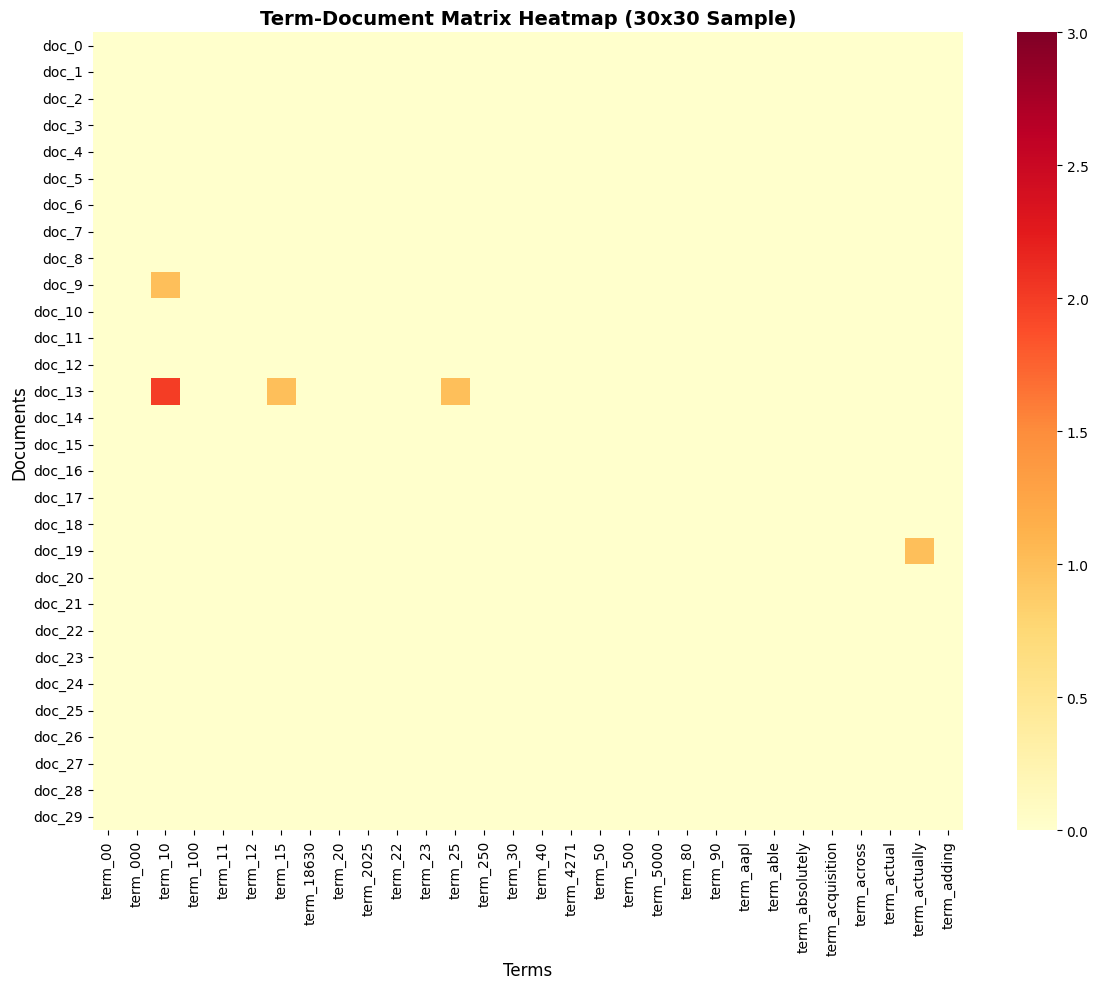


The heatmap shows term frequency distribution across documents.
Darker colors indicate higher term frequencies, revealing sparse nature of text data.


In [109]:
# Create a heatmap of a subset of the term-document matrix
sample_size = 30
plot_x = ["term_" + str(i) for i in count_vect_reddit.get_feature_names_out()[:sample_size]]
plot_y = ["doc_" + str(i) for i in range(sample_size)]
plot_z = X_counts_reddit[:sample_size, :sample_size].toarray()

df_heatmap = pd.DataFrame(plot_z, columns=plot_x, index=plot_y)

plt.figure(figsize=(12, 10))
sns.heatmap(df_heatmap, cmap="YlOrRd", vmin=0, vmax=3, annot=False, cbar=True)
plt.title(f'Term-Document Matrix Heatmap ({sample_size}x{sample_size} Sample)', fontsize=14, fontweight='bold')
plt.xlabel('Terms', fontsize=12)
plt.ylabel('Documents', fontsize=12)
plt.tight_layout()
plt.show()

print(f"\nThe heatmap shows term frequency distribution across documents.")
print(f"Darker colors indicate higher term frequencies, revealing sparse nature of text data.")

**Key Finding:** The vocabulary contains 1000 features after stopword removal and frequency filtering. The most frequent terms include "us" (96 occurrences), "trump" (92), "like" (83), "market" (82), and "china" (72), reflecting the political and economic themes in stock market discussions on Reddit.

### 7. Data Visualizations

Create meaningful visualizations to explore patterns and relationships in the Reddit stock sentiment data.

#### 7.1 Sentiment Distribution

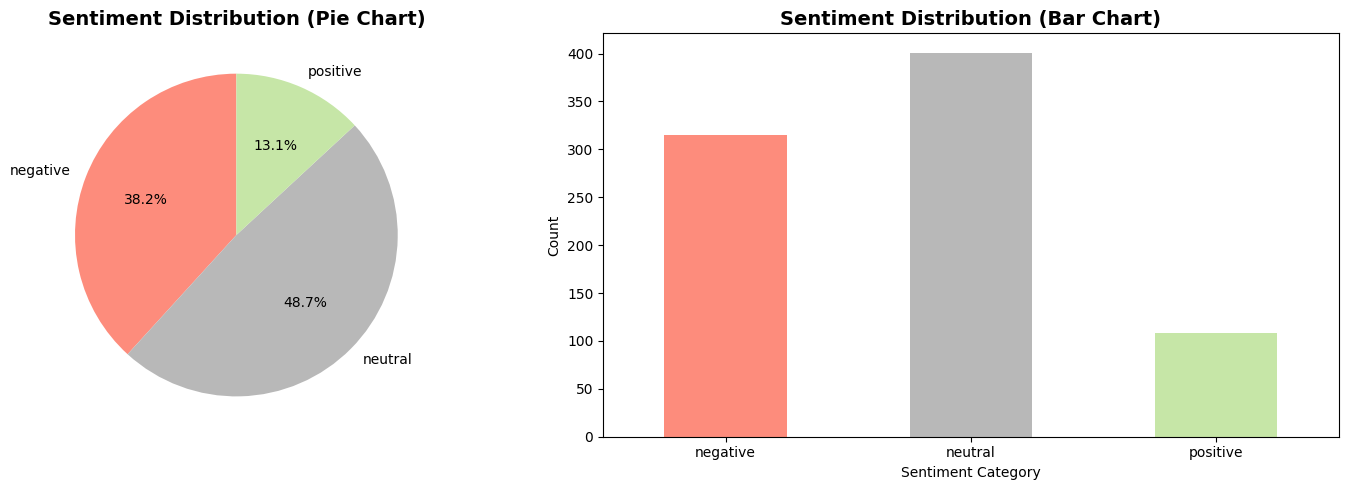

Sentiment distribution:
sentiment_category
negative    315
neutral     401
positive    108
Name: count, dtype: int64


In [110]:
# Create a comprehensive sentiment distribution visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Define consistent color scheme and order
sentiment_order = ['negative', 'neutral', 'positive']
sentiment_colors = {'negative': '#FD8C7C', 'neutral': '#B8B8B8', 'positive': '#C6E6A7'}
colors_list = [sentiment_colors[cat] for cat in sentiment_order]

# Get sentiment counts in consistent order
sentiment_counts = X_reddit_sample['sentiment_category'].value_counts()
sentiment_counts = sentiment_counts.reindex(sentiment_order)

# Pie chart
axes[0].pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%',
            colors=colors_list, startangle=90)
axes[0].set_title('Sentiment Distribution (Pie Chart)', fontsize=14, fontweight='bold')

# Bar chart
sentiment_counts.plot(kind='bar', ax=axes[1], color=colors_list)
axes[1].set_title('Sentiment Distribution (Bar Chart)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Sentiment Category')
axes[1].set_ylabel('Count')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()

print(f"Sentiment distribution:")
print(sentiment_counts)

**Insight:** The dataset shows significant class imbalance with neutral sentiment dominating at 48.7% (401 posts), followed by negative at 38.2% (315 posts), and positive at only 13.1% (108 posts). This distribution is typical for social media discussions where many posts are informational rather than strongly opinionated.

#### 7.2 Top Frequent Terms

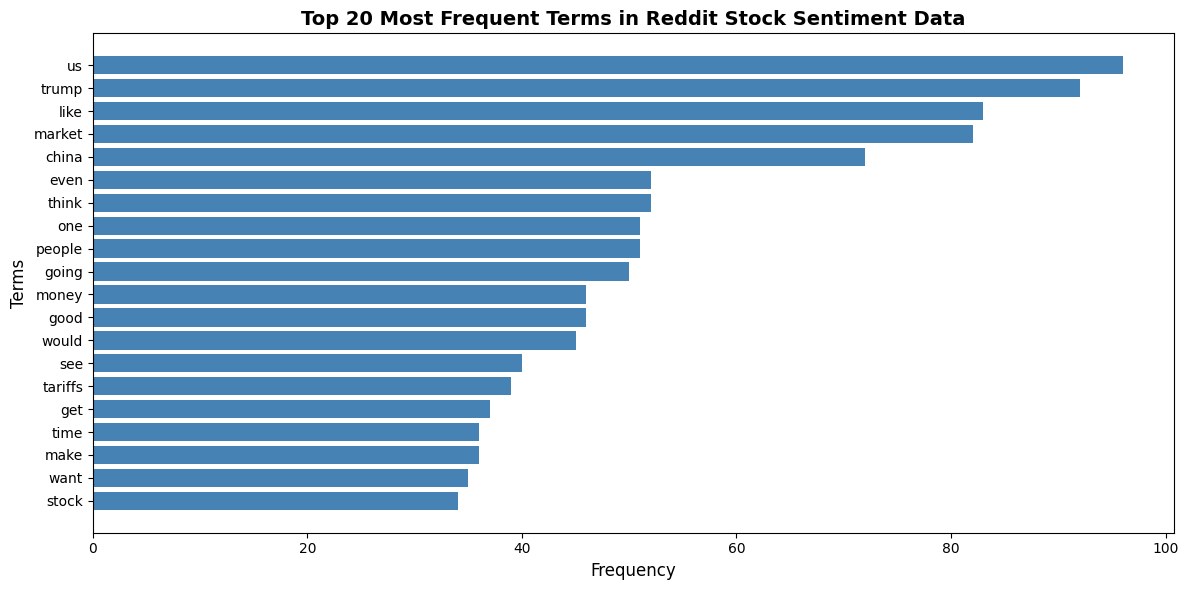

In [111]:
# Visualize top frequent terms
plt.figure(figsize=(12, 6))
plt.barh(range(len(top_terms)), top_freqs, color='steelblue')
plt.yticks(range(len(top_terms)), top_terms)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Terms', fontsize=12)
plt.title('Top 20 Most Frequent Terms in Reddit Stock Sentiment Data', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

**Insight:** Political terms dominate the corpus with "trump" (92 occurrences) and "china" (72 occurrences) ranking highly alongside economic terms like "market" (82), "money" (46), and "stock" (34). The term "us" (96) is the most frequent, suggesting discussions about US market conditions. This reveals that political events significantly influence stock market sentiment discussions on Reddit.

#### 7.3 Text Length Distribution by Sentiment

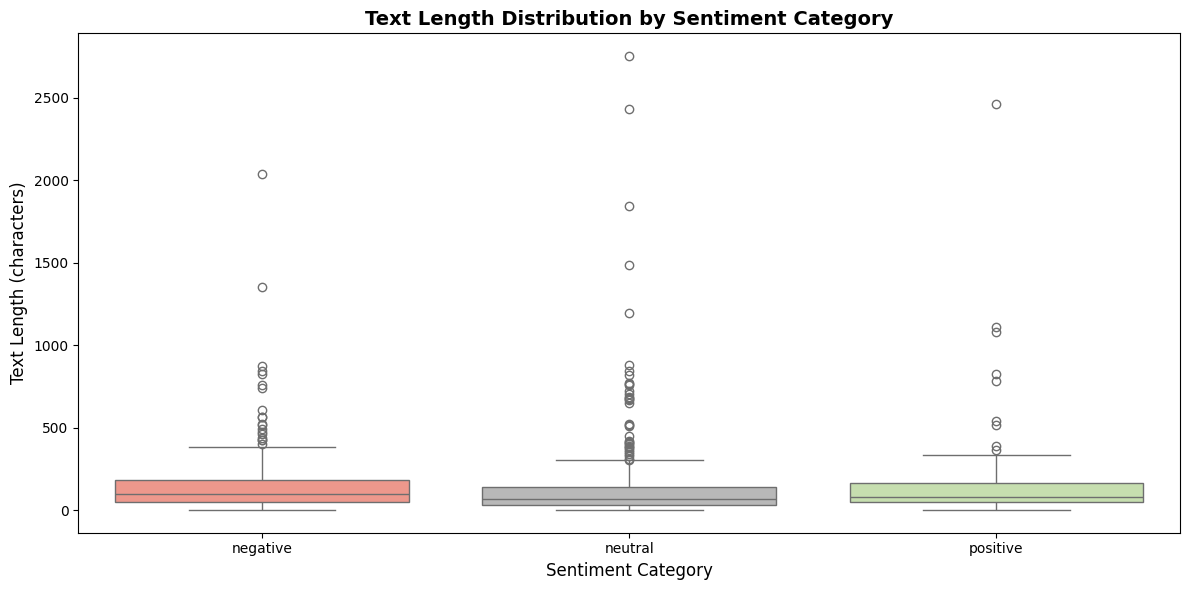

Text length statistics by sentiment:
                    count        mean         std  min   25%   50%     75%  \
sentiment_category                                                           
negative            315.0  153.736508  192.132063  4.0  47.5  96.0  184.50   
neutral             401.0  139.132170  259.276802  1.0  32.0  68.0  141.00   
positive            108.0  165.333333  293.420466  4.0  48.0  81.5  167.25   

                       max  
sentiment_category          
negative            2040.0  
neutral             2753.0  
positive            2461.0  


In [112]:
# Box plot for text length distribution by sentiment
# Define consistent color scheme and order
sentiment_order = ['negative', 'neutral', 'positive']
sentiment_colors = {'negative': '#FD8C7C', 'neutral': '#B8B8B8', 'positive': '#C6E6A7'}

plt.figure(figsize=(12, 6))
sns.boxplot(data=X_reddit_sample, x='sentiment_category', y='text_length', 
            order=sentiment_order,
            palette=sentiment_colors)
plt.title('Text Length Distribution by Sentiment Category', fontsize=14, fontweight='bold')
plt.xlabel('Sentiment Category', fontsize=12)
plt.ylabel('Text Length (characters)', fontsize=12)
plt.tight_layout()
plt.show()

# Display statistics
print("Text length statistics by sentiment:")
print(X_reddit_sample.groupby('sentiment_category')['text_length'].describe().loc[sentiment_order])

**Insight:** Text length shows minimal variation across sentiment categories. Negative posts average 153.7 characters, neutral posts 139.1 characters, and positive posts 165.3 characters. While positive posts are slightly longer on average, the differences are not substantial. All categories show high variability (large standard deviations) and multiple outliers, indicating diverse posting styles within each sentiment group.

#### 7.4 Sentiment Distribution by Subreddit

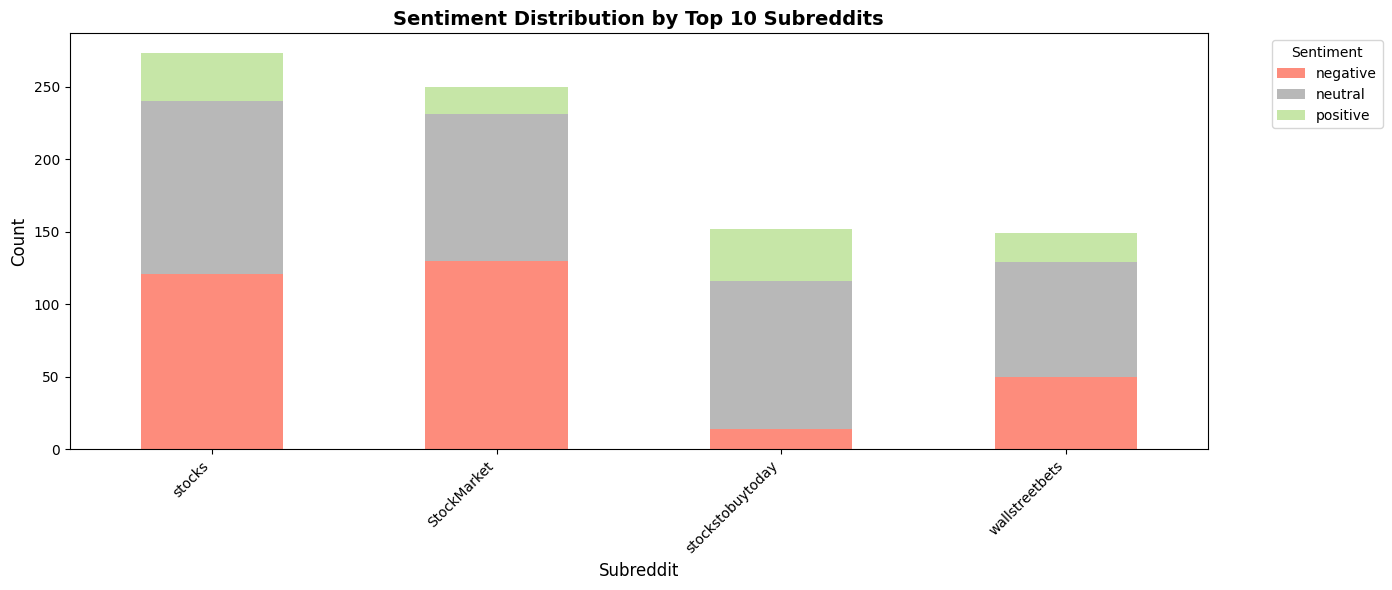

Sentiment distribution by subreddit:
sentiment_category  negative  neutral  positive
subreddit                                      
stocks                   121      119        33
StockMarket              130      101        19
stockstobuytoday          14      102        36
wallstreetbets            50       79        20


In [113]:
# Stacked bar chart for sentiment distribution by subreddit
# Define consistent color scheme and order
sentiment_order = ['negative', 'neutral', 'positive']
sentiment_colors = {'negative': '#FD8C7C', 'neutral': '#B8B8B8', 'positive': '#C6E6A7'}
colors_list = [sentiment_colors[cat] for cat in sentiment_order]

sentiment_by_subreddit = pd.crosstab(X_reddit_sample['subreddit'], 
                                      X_reddit_sample['sentiment_category'])

# Select top subreddits
top_subreddits = X_reddit_sample['subreddit'].value_counts().head(10).index
sentiment_by_subreddit_top = sentiment_by_subreddit.loc[top_subreddits]

# Reorder columns to match consistent order
sentiment_by_subreddit_top = sentiment_by_subreddit_top[sentiment_order]

# Create stacked bar chart
ax = sentiment_by_subreddit_top.plot(kind='bar', stacked=True, figsize=(14, 6),
                                      color=colors_list)
plt.title('Sentiment Distribution by Top 10 Subreddits', fontsize=14, fontweight='bold')
plt.xlabel('Subreddit', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("Sentiment distribution by subreddit:")
print(sentiment_by_subreddit_top)

**Insight:** Different subreddits exhibit distinct sentiment patterns. StockMarket shows more negative sentiment (130 negative vs 101 neutral vs 19 positive), while stockstobuytoday is predominantly neutral and positive (102 neutral, 36 positive vs only 14 negative). The stocks and wallstreetbets subreddits display more balanced distributions. This reflects the unique community cultures and discussion purposes of each subreddit.

#### 7.5 Correlation Heatmap

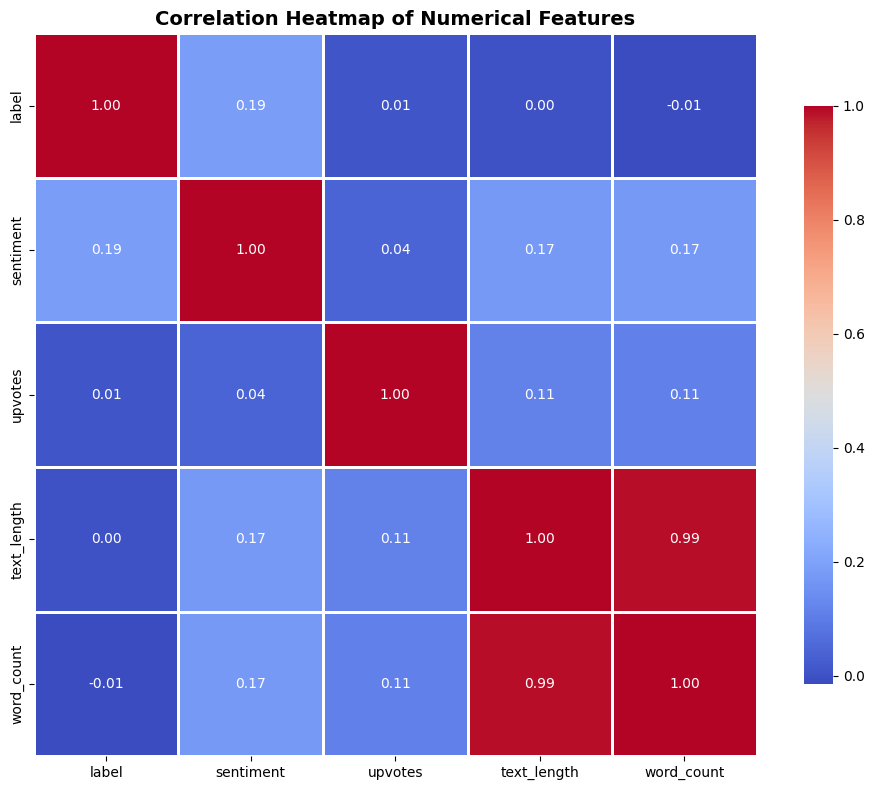

Correlation matrix:
                label  sentiment   upvotes  text_length  word_count
label        1.000000   0.187111  0.009131     0.000720   -0.013829
sentiment    0.187111   1.000000  0.044706     0.173194    0.173510
upvotes      0.009131   0.044706  1.000000     0.113550    0.111305
text_length  0.000720   0.173194  0.113550     1.000000    0.991222
word_count  -0.013829   0.173510  0.111305     0.991222    1.000000

                label  sentiment   upvotes  text_length  word_count
label        1.000000   0.187111  0.009131     0.000720   -0.013829
sentiment    0.187111   1.000000  0.044706     0.173194    0.173510
upvotes      0.009131   0.044706  1.000000     0.113550    0.111305
text_length  0.000720   0.173194  0.113550     1.000000    0.991222
word_count  -0.013829   0.173510  0.111305     0.991222    1.000000


In [114]:
# Create correlation heatmap for numerical features
numerical_features = X_reddit_sample[['label', 'sentiment', 'upvotes', 'text_length', 'word_count']].copy()
correlation_matrix = numerical_features.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap of Numerical Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("Correlation matrix:")
print(correlation_matrix)

**Insight:** The correlation analysis reveals weak relationship (0.19) between label and sentiment columns, confirming the data quality issue noted earlier where 54% of rows have inconsistent values. Text length and word count show very strong correlation (0.99), which is expected. Notably, upvotes show minimal correlation with all variables (all correlations < 0.12), indicating that post popularity is not strongly tied to sentiment polarity, text length, or other measured features.

#### 7.6 Time Series Analysis

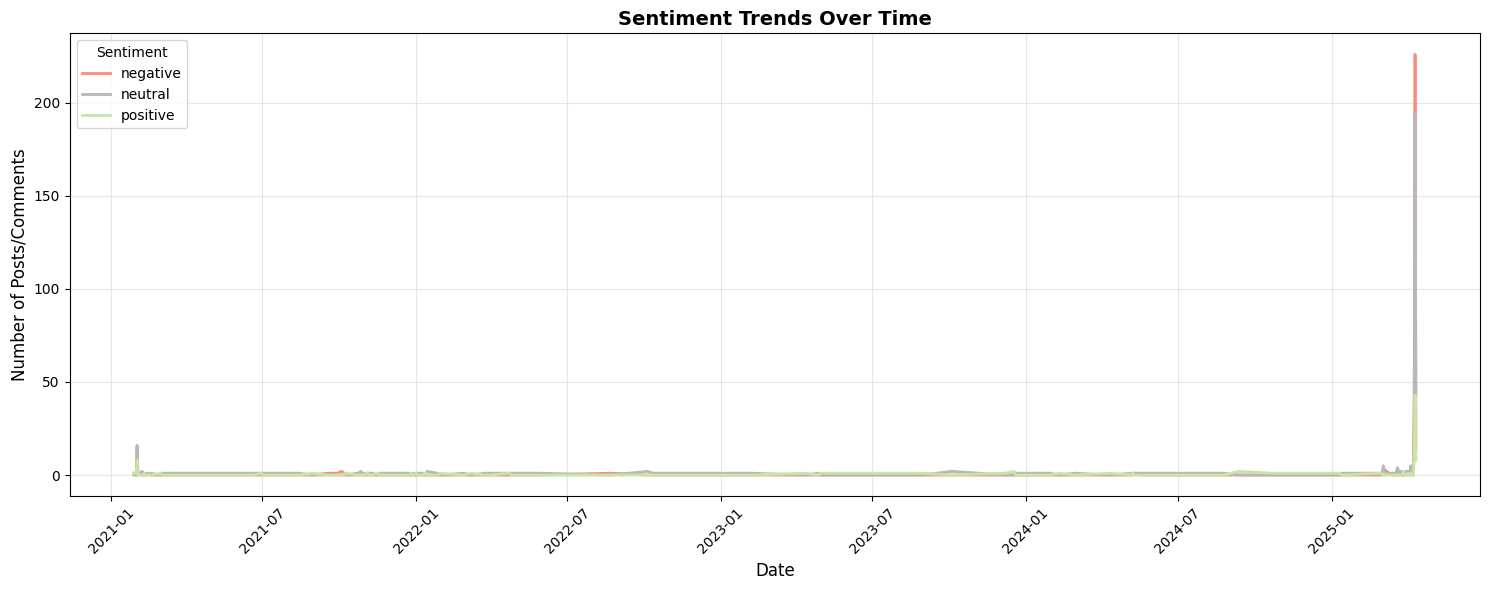

Daily sentiment counts (first 10 days):
sentiment_category  negative  neutral  positive
date                                           
2021-01-28                 1        0         1
2021-01-31                 0        0         1
2021-02-01                15       16         8
2021-02-02                 0        1         0
2021-02-03                 1        0         0
2021-02-07                 0        2         0
2021-02-10                 0        0         1
2021-02-11                 0        1         0
2021-02-12                 1        0         0
2021-02-17                 0        1         0


In [115]:
# Convert datetime to proper format and analyze temporal patterns
# Define consistent color scheme and order
sentiment_order = ['negative', 'neutral', 'positive']
sentiment_colors = {'negative': '#FD8C7C', 'neutral': '#B8B8B8', 'positive': '#C6E6A7'}
colors_list = [sentiment_colors[cat] for cat in sentiment_order]

X_reddit_time = X_reddit_sample.copy()
X_reddit_time['datetime'] = pd.to_datetime(X_reddit_time['datetime'])
X_reddit_time['date'] = X_reddit_time['datetime'].dt.date

# Aggregate sentiment by date
sentiment_time = X_reddit_time.groupby(['date', 'sentiment_category']).size().unstack(fill_value=0)

# Reorder columns to match consistent order
sentiment_time = sentiment_time[sentiment_order]

# Plot time series
fig, ax = plt.subplots(figsize=(15, 6))
sentiment_time.plot(ax=ax, color=colors_list, linewidth=2)
plt.title('Sentiment Trends Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Posts/Comments', fontsize=12)
plt.legend(title='Sentiment', loc='upper left')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Daily sentiment counts (first 10 days):")
print(sentiment_time.head(10))

**Insight:** The time series reveals a concentrated burst of activity in late January 2025, with a massive spike on 2025-01-31 showing over 200 posts across all sentiments (primarily negative and neutral). Prior to this, activity was sporadic with only occasional posts from 2021-2023. This pattern suggests the dataset may focus on a specific recent market event or that data collection was concentrated in this period.

#### 7.7 Word Count Distribution by Sentiment

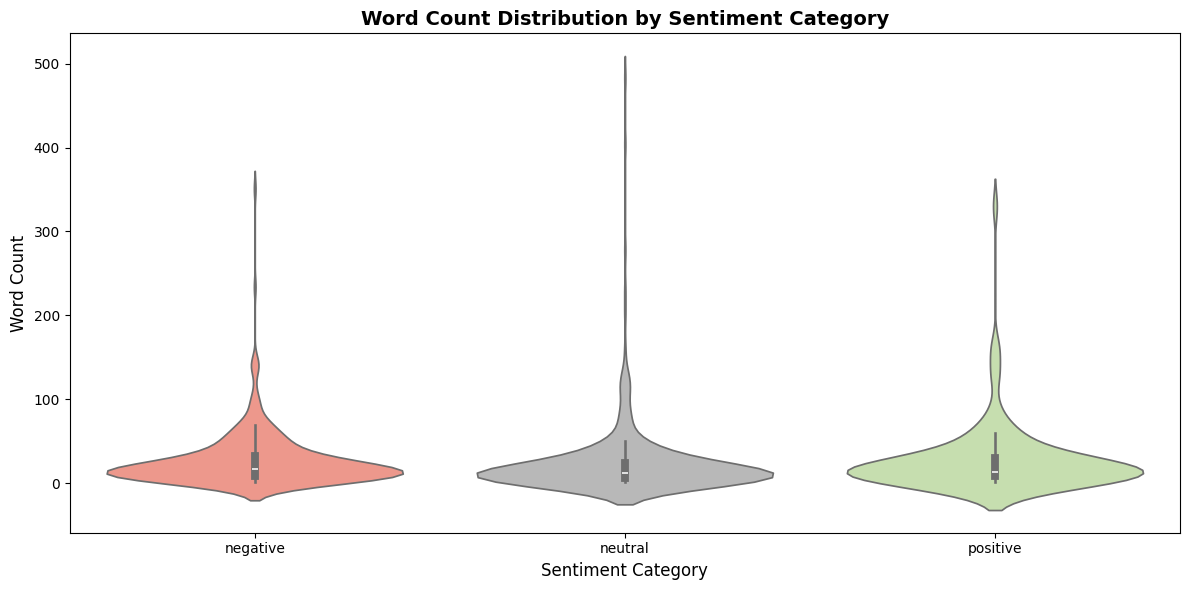

Word count statistics by sentiment:
                    count       mean        std  min  25%   50%    75%    max
sentiment_category                                                           
negative            315.0  27.441270  33.479990  1.0  9.0  17.0  33.00  351.0
neutral             401.0  23.890274  43.162286  1.0  6.0  12.0  24.00  483.0
positive            108.0  27.851852  41.856411  1.0  9.0  14.0  30.25  330.0


In [116]:
# Violin plot for word count distribution
# Define consistent color scheme and order
sentiment_order = ['negative', 'neutral', 'positive']
sentiment_colors = {'negative': '#FD8C7C', 'neutral': '#B8B8B8', 'positive': '#C6E6A7'}

plt.figure(figsize=(12, 6))
sns.violinplot(data=X_reddit_sample, x='sentiment_category', y='word_count',
               order=sentiment_order,
               palette=sentiment_colors)
plt.title('Word Count Distribution by Sentiment Category', fontsize=14, fontweight='bold')
plt.xlabel('Sentiment Category', fontsize=12)
plt.ylabel('Word Count', fontsize=12)
plt.tight_layout()
plt.show()

# Display statistics
print("Word count statistics by sentiment:")
print(X_reddit_sample.groupby('sentiment_category')['word_count'].describe().loc[sentiment_order])

**Insight:** Word count distributions across sentiments mirror the text length patterns. The median word count is low across all categories (negative: ~17 words, neutral: ~12 words, positive: ~14 words), with most posts containing fewer than 30 words. The violin plot reveals that all sentiment categories have similar distribution shapes with long tails, indicating occasional very lengthy posts regardless of sentiment.

---

### Summary of Phase 1 Analysis

**Dataset Overview:**
- Final dataset: 824 unique Reddit posts (after removing 23 duplicates)
- Time period: Primarily concentrated in late January 2025 with sporadic earlier posts
- Class distribution: 401 neutral (48.7%), 315 negative (38.2%), 108 positive (13.1%)
- Data quality issue: 54% inconsistency between 'label' and 'sentiment' columns (458 rows)

**Key Characteristics:**
- **Text properties:** Median 79.5 characters, 14 words; 75th percentile at 30 words
- **Top terms:** "us" (96), "trump" (92), "like" (83), "market" (82), "china" (72)
- **Missing values:** Original dataset has 92.44% missing in downvotes/upvote_ratio columns
- **Subreddit patterns:** StockMarket is more negative; stockstobuytoday is more neutral/positive

**Feature Engineering:**
- Created 1000-dimensional sparse matrix using CountVectorizer
- Extracted text_length and word_count features
- Removed English stopwords; applied min_df=2 threshold
- Term-document matrix shape: (824, 1000)

**Main Insights:**
1. Political events (Trump, China) heavily influence stock sentiment discussions
2. Upvotes show minimal correlation with sentiment (r < 0.12)
3. Text length and word count are highly correlated (r = 0.99) but don't vary significantly across sentiments
4. Dataset is imbalanced and temporally concentrated, requiring careful handling in classification
5. Different subreddit communities exhibit distinct sentiment patterns

---

### Phase 2

### Outline

This phase continues the data mining process with advanced techniques:

8. **Frequent Pattern Mining**
- 8.1 Prepare Transactional Database
- 8.2 Mine Frequent Patterns using FPGrowth
- 8.3 Identify Unique Patterns per Sentiment
- 8.4 Data Augmentation with Pattern Features

9. **TF-IDF Feature Extraction**
- 9.1 Generate TF-IDF Features
- 9.2 Compare TF-IDF vs Count Features

10. **Classification with Naive Bayes**
- 10.1 Train-Test Data Split
- 10.2 NB with Count Features
- 10.3 NB with TF-IDF Features
- 10.4 NB with Count + Pattern Features
- 10.5 NB with TF-IDF + Pattern Features
- 10.6 Performance Comparison

11. **Dimensionality Reduction & Visualization**
- 11.1 PCA Visualization
- 11.2 t-SNE Visualization
- 11.3 UMAP Visualization

12. **Reflection on Improvements**
- 12.1 Identified Inefficiencies
- 12.2 Proposed Preprocessing Pipeline

---

### 8. Frequent Pattern Mining

#### 8.1 Prepare Transactional Database

Convert the document-term matrix into transactional format for pattern mining using PAMI library.

In [117]:
# Create term-document dataframes for each sentiment category
import pandas as pd

# Get feature names
terms_reddit = count_vect_reddit.get_feature_names_out()

# Create a dataframe from the count matrix
tdm_df_reddit = pd.DataFrame(X_counts_reddit.toarray(), columns=terms_reddit)

# Add sentiment category
tdm_df_reddit['sentiment_category'] = X_reddit_sample['sentiment_category'].values

print(f"Term-Document Matrix shape: {tdm_df_reddit.shape}")
print(f"\nSentiment distribution in TDM:")
print(tdm_df_reddit['sentiment_category'].value_counts())

# Split by sentiment category
category_dfs_reddit = {}
for sentiment in ['negative', 'neutral', 'positive']:
    category_dfs_reddit[sentiment] = tdm_df_reddit[tdm_df_reddit['sentiment_category'] == sentiment].drop('sentiment_category', axis=1)
    print(f"\n{sentiment.capitalize()} category shape: {category_dfs_reddit[sentiment].shape}")

Term-Document Matrix shape: (824, 1001)

Sentiment distribution in TDM:
sentiment_category
neutral     401
negative    315
positive    108
Name: count, dtype: int64

Negative category shape: (315, 1000)

Neutral category shape: (401, 1000)

Positive category shape: (108, 1000)


In [118]:
# Filter terms: keep only those with frequency > 0 in at least one document
filt_term_document_dfs_reddit = {}

for sentiment, df in category_dfs_reddit.items():
    # Keep only columns (terms) that have at least one non-zero value
    non_zero_cols = df.columns[df.sum() > 0]
    filt_term_document_dfs_reddit[sentiment] = df[non_zero_cols]
    
    print(f"{sentiment.capitalize()} - Original terms: {df.shape[1]}, Filtered terms: {len(non_zero_cols)}")

print("\nFiltered dataframes created successfully.")

Negative - Original terms: 1000, Filtered terms: 836
Neutral - Original terms: 1000, Filtered terms: 892
Positive - Original terms: 1000, Filtered terms: 501

Filtered dataframes created successfully.


In [119]:
# Convert to transactional format and save as CSV files for PAMI
# Format: each row is a transaction (document) with items (words) that appear in it

for sentiment, df in filt_term_document_dfs_reddit.items():
    transactions = []
    
    for idx, row in df.iterrows():
        # Get terms that appear in this document (frequency > 0)
        terms_in_doc = row[row > 0].index.tolist()
        # Create transaction: join terms with tabs
        if terms_in_doc:  # Only add if there are terms
            transaction = '\t'.join(terms_in_doc)
            transactions.append(transaction)
    
    # Save to CSV file
    filename = f'td_freq_db_{sentiment}.csv'
    with open(filename, 'w', encoding='utf-8') as f:
        for transaction in transactions:
            f.write(transaction + '\n')
    
    print(f"Created {filename} with {len(transactions)} transactions")

Created td_freq_db_negative.csv with 305 transactions
Created td_freq_db_neutral.csv with 362 transactions
Created td_freq_db_positive.csv with 105 transactions


#### 8.2 Mine Frequent Patterns using FPGrowth

Apply FPGrowth algorithm to discover frequent word patterns in each sentiment category. We'll set minimum support based on the dataset characteristics.

In [120]:
# Mine frequent patterns for each sentiment category
from PAMI.frequentPattern.basic import FPGrowth as alg

# Set minimum support - adjusted for smaller dataset
# Using percentage: 5% of documents in each category should contain the pattern
minSup_reddit = 5

frequent_patterns_reddit = {}

for sentiment in ['negative', 'neutral', 'positive']:
    print(f"\n{'='* 50}")
    print(f"Mining patterns for {sentiment.upper()} sentiment")
    print('='* 50)
    
    filename = f'td_freq_db_{sentiment}.csv'
    
    # Create FPGrowth object and mine patterns
    obj = alg.FPGrowth(iFile=filename, minSup=minSup_reddit)
    obj.mine()
    
    # Get patterns as dataframe
    patterns_df = obj.getPatternsAsDataFrame()
    frequent_patterns_reddit[sentiment] = patterns_df
    
    print(f"Total patterns found: {len(patterns_df)}")
    print(f"Runtime: {obj.getRuntime():.4f} seconds")
    
    # Save patterns to file
    output_file = f'freq_patterns_{sentiment}_minSup{minSup_reddit}.txt'
    obj.save(output_file)
    print(f"Patterns saved to: {output_file}")
    
    # Display top 10 patterns
    if len(patterns_df) > 0:
        print(f"\nTop 10 frequent patterns:")
        print(patterns_df.head(10))

print(f"\n{'='* 50}")
print("Pattern mining completed for all sentiment categories")
print('='* 50)


Mining patterns for NEGATIVE sentiment
Frequent patterns were generated successfully using frequentPatternGrowth algorithmFrequent patterns were generated successfully using frequentPatternGrowth algorithm
Total patterns found: 222
Runtime: 0.0281 seconds
Patterns saved to: freq_patterns_negative_minSup5.txt

Top 10 frequent patterns:
     Patterns  Support
0     looking        5
1       weeks        5
2         let        5
3       maybe        5
4      office        5
5        idea        5
6        many        5
7        safe        5
8  treasuries        5
9        dont        5

Mining patterns for NEUTRAL sentiment
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total patterns found: 231
Runtime: 0.0306 seconds
Patterns saved to: freq_patterns_neutral_minSup5.txt

Top 10 frequent patterns:
   Patterns  Support
0       red        5
1        15        5
2    pretty        5
3       usa        5
4  thoughts        5
5      2025        5
6  actual

**Key Finding:** FPGrowth successfully mined frequent patterns across all sentiment categories. Negative sentiment yielded 222 patterns, neutral yielded 231 patterns, and positive yielded only 18 patterns. The significantly lower pattern count for positive sentiment (13.1% of data) reflects the class imbalance issue - fewer documents result in fewer discoverable patterns.

#### 8.3 Identify Unique Patterns per Sentiment

Extract patterns that are unique to each sentiment category - these will be the most discriminative features for classification.

In [121]:
# Collect all patterns from all dataframes
all_dfs = [frequent_patterns_reddit[sentiment] for sentiment in ['negative', 'neutral', 'positive']]

# Get all unique patterns across all sentiments
all_patterns = set()
for df in all_dfs:
    if len(df) > 0:
        all_patterns.update(df['Patterns'].values)

print(f"Total unique patterns across all sentiments: {len(all_patterns)}")

# Find unique patterns for each sentiment
unique_patterns_reddit = {}
total_patterns = 0
discarded_patterns = 0

for sentiment in ['negative', 'neutral', 'positive']:
    df = frequent_patterns_reddit[sentiment]
    
    if len(df) == 0:
        unique_patterns_reddit[sentiment] = set()
        print(f"\n{sentiment.capitalize()}: No patterns found")
        continue
    
    # Get patterns for this sentiment
    patterns = set(df['Patterns'].values)
    
    # Get patterns from other sentiments
    other_patterns = set()
    for other_sentiment in ['negative', 'neutral', 'positive']:
        if other_sentiment != sentiment:
            other_df = frequent_patterns_reddit[other_sentiment]
            if len(other_df) > 0:
                other_patterns.update(other_df['Patterns'].values)
    
    # Find unique patterns (present in this sentiment but not in others)
    unique = patterns - other_patterns
    unique_patterns_reddit[sentiment] = unique
    
    total_patterns += len(patterns)
    discarded_patterns += len(patterns) - len(unique)
    
    print(f"\n{sentiment.capitalize()}:")
    print(f"  Total patterns: {len(patterns)}")
    print(f"  Unique patterns: {len(unique)}")
    print(f"  Discarded (shared): {len(patterns) - len(unique)}")
    if len(unique) > 0:
        print(f"  Sample unique patterns: {list(unique)[:5]}")

print(f"\n{'='* 50}")
print(f"Summary: {total_patterns} total patterns, {discarded_patterns} shared patterns removed")
print(f"Remaining unique patterns: {sum(len(p) for p in unique_patterns_reddit.values())}")
print('='* 50)

Total unique patterns across all sentiments: 363

Negative:
  Total patterns: 222
  Unique patterns: 130
  Discarded (shared): 92
  Sample unique patterns: ['one\tus', 'seems\tlike', 'happening', 'china\ttrump', 'treasuries']

Neutral:
  Total patterns: 231
  Unique patterns: 139
  Discarded (shared): 92
  Sample unique patterns: ['started', '15', 'investors\tmarket', 'usd', 'stocks\tlike']

Positive:
  Total patterns: 18
  Unique patterns: 1
  Discarded (shared): 17
  Sample unique patterns: ['technology']

Summary: 471 total patterns, 201 shared patterns removed
Remaining unique patterns: 270


**Key Finding:** After filtering out shared patterns, we retained 270 unique discriminative patterns (130 for negative, 139 for neutral, 1 for positive). The positive class has extremely limited unique patterns due to its small sample size, which may limit the effectiveness of pattern augmentation for this minority class. Out of 471 total patterns, 201 (42.7%) were discarded as they appeared across multiple sentiments.

#### 8.4 Data Augmentation with Pattern Features

Create new binary features indicating presence of unique patterns in each document.

In [122]:
# Create augmented dataset with pattern features
import numpy as np

# Function to check if a pattern exists in a document
def pattern_in_document(pattern, doc_terms):
    """Check if all words in pattern appear in document"""
    pattern_words = set(pattern.split())
    return pattern_words.issubset(doc_terms)

# Create pattern matrix
print("Creating pattern features...")

# Collect all unique patterns across all sentiments
all_unique_patterns = []
pattern_to_sentiment = {}

for sentiment, patterns in unique_patterns_reddit.items():
    for pattern in patterns:
        all_unique_patterns.append(pattern)
        pattern_to_sentiment[pattern] = sentiment

print(f"Total unique patterns to use as features: {len(all_unique_patterns)}")

# Initialize pattern matrix (documents x patterns)
pattern_matrix = np.zeros((len(X_reddit_sample), len(all_unique_patterns)), dtype=int)

# Get vocabulary for quick lookup
vocab_set = set(terms_reddit)

# For each document, check which patterns are present
for doc_idx in range(len(X_reddit_sample)):
    # Get terms in this document
    doc_vector = X_counts_reddit[doc_idx].toarray()[0]
    doc_terms = set([terms_reddit[i] for i in range(len(doc_vector)) if doc_vector[i] > 0])
    
    # Check each pattern
    for pattern_idx, pattern in enumerate(all_unique_patterns):
        if pattern_in_document(pattern, doc_terms):
            pattern_matrix[doc_idx, pattern_idx] = 1

# Convert to DataFrame
pattern_columns = [f"pattern_{i}_{pattern_to_sentiment[p]}" for i, p in enumerate(all_unique_patterns)]
pattern_df = pd.DataFrame(pattern_matrix, columns=pattern_columns, index=X_reddit_sample.index)

print(f"Pattern matrix shape: {pattern_matrix.shape}")
print(f"Total pattern occurrences: {pattern_matrix.sum()}")
print(f"Documents with at least one pattern: {(pattern_matrix.sum(axis=1) > 0).sum()}")

# Show sample
print(f"\nSample pattern features:")
print(pattern_df.iloc[:5, :10])

Creating pattern features...
Total unique patterns to use as features: 270
Pattern matrix shape: (824, 270)
Total pattern occurrences: 2428
Documents with at least one pattern: 595

Sample pattern features:
   pattern_0_negative  pattern_1_negative  pattern_2_negative  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   pattern_3_negative  pattern_4_negative  pattern_5_negative  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   pattern_

**Key Finding:** Created 270 binary pattern features indicating presence of unique sentiment-specific word combinations. Pattern features are present in 595 out of 824 documents (72.2%), with 2,428 total pattern occurrences. This augmentation adds discriminative information beyond individual word frequencies.

In [123]:
# Combine original features with pattern features
from scipy.sparse import hstack, csr_matrix

# Convert pattern matrix to sparse format
pattern_sparse = csr_matrix(pattern_matrix)

# Combine count features with pattern features
X_augmented_reddit = hstack([X_counts_reddit, pattern_sparse])

print(f"Original feature matrix shape: {X_counts_reddit.shape}")
print(f"Pattern feature matrix shape: {pattern_sparse.shape}")
print(f"Augmented feature matrix shape: {X_augmented_reddit.shape}")
print(f"\nFeature breakdown:")
print(f"  - Count features: {X_counts_reddit.shape[1]}")
print(f"  - Pattern features: {pattern_sparse.shape[1]}")
print(f"  - Total features: {X_augmented_reddit.shape[1]}")

Original feature matrix shape: (824, 1000)
Pattern feature matrix shape: (824, 270)
Augmented feature matrix shape: (824, 1270)

Feature breakdown:
  - Count features: 1000
  - Pattern features: 270
  - Total features: 1270


---

### 9. TF-IDF Feature Extraction

#### 9.1 Generate TF-IDF Features

Transform text data using TF-IDF (Term Frequency-Inverse Document Frequency) weighting scheme, which gives higher weight to terms that are frequent in a document but rare across all documents.

In [124]:
# Create TF-IDF features
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF vectorizer with same parameters as CountVectorizer
tfidf_vect_reddit = TfidfVectorizer(
    max_features=1000,
    stop_words=stop_words,
    lowercase=True,
    min_df=2,
    norm='l2',  # L2 normalization
    use_idf=True,  # Enable IDF weighting
    smooth_idf=True,  # Smooth IDF weights
    sublinear_tf=False  # Use raw term frequency
)

# Fit and transform
X_tfidf_reddit = tfidf_vect_reddit.fit_transform(X_reddit_sample['text'])

print(f"TF-IDF matrix shape: {X_tfidf_reddit.shape}")
print(f"Number of features: {len(tfidf_vect_reddit.vocabulary_)}")
print(f"Matrix density: {X_tfidf_reddit.nnz / (X_tfidf_reddit.shape[0] * X_tfidf_reddit.shape[1]):.4f}")

print("\n" + "="* 50)
print("TF-IDF vs Count Vectorization:")
print("="* 50)
print(f"Count matrix - non-zero elements: {X_counts_reddit.nnz}")
print(f"TF-IDF matrix - non-zero elements: {X_tfidf_reddit.nnz}")
print(f"\nBoth matrices have the same sparsity structure,")
print(f"but TF-IDF assigns different weights based on term importance.")

TF-IDF matrix shape: (824, 1000)
Number of features: 1000
Matrix density: 0.0081

TF-IDF vs Count Vectorization:
Count matrix - non-zero elements: 6697
TF-IDF matrix - non-zero elements: 6697

Both matrices have the same sparsity structure,
but TF-IDF assigns different weights based on term importance.


#### 9.2 Compare TF-IDF vs Count Features

Compare the weight distributions between count-based and TF-IDF features to understand the differences.

In [125]:
# Compare sample document weights
sample_doc_idx = 0

# Get count vector
count_vec = X_counts_reddit[sample_doc_idx].toarray()[0]
# Get TF-IDF vector
tfidf_vec = X_tfidf_reddit[sample_doc_idx].toarray()[0]

# Find non-zero terms
non_zero_indices = np.where(count_vec > 0)[0]

print(f"Sample document (index {sample_doc_idx}):")
print(f"Text: {X_reddit_sample.iloc[sample_doc_idx]['text'][:200]}...\n")

print("Term | Count | TF-IDF")
print("-" * 50)
for idx in non_zero_indices[:10]:  # Show first 10 terms
    term = terms_reddit[idx]
    print(f"{term:15} | {count_vec[idx]:5.0f} | {tfidf_vec[idx]:6.4f}")

print("\nNotice: TF-IDF weights are normalized and scaled by inverse document frequency,")
print("giving higher weights to terms that are distinctive to this document.")

Sample document (index 0):
Text: Calls on retards...

Term | Count | TF-IDF
--------------------------------------------------
calls           |     1 | 0.6312
retards         |     1 | 0.7756

Notice: TF-IDF weights are normalized and scaled by inverse document frequency,
giving higher weights to terms that are distinctive to this document.


In [126]:
# Create TF-IDF augmented features (with pattern features)
X_tfidf_augmented_reddit = hstack([X_tfidf_reddit, pattern_sparse])

print(f"TF-IDF augmented matrix shape: {X_tfidf_augmented_reddit.shape}")
print(f"\nFeature breakdown:")
print(f"  - TF-IDF features: {X_tfidf_reddit.shape[1]}")
print(f"  - Pattern features: {pattern_sparse.shape[1]}")
print(f"  - Total features: {X_tfidf_augmented_reddit.shape[1]}")

TF-IDF augmented matrix shape: (824, 1270)

Feature breakdown:
  - TF-IDF features: 1000
  - Pattern features: 270
  - Total features: 1270


**Key Finding:** TF-IDF matrix has the same shape (824, 1000) and sparsity structure as the count matrix, but with normalized weights. TF-IDF downweights common terms and emphasizes distinctive terms, which can be more effective for certain classifiers, particularly when dealing with documents of varying lengths.

---

### 10. Classification with Naive Bayes

#### 10.1 Prepare Train-Test Split

Split the data into training and testing sets for model evaluation.

In [127]:
# Prepare data for classification
from sklearn.model_selection import train_test_split

# Get labels
y_reddit = X_reddit_sample['sentiment_category'].values

# Split data (80% train, 20% test)
X_count_train, X_count_test, y_train, y_test = train_test_split(
    X_counts_reddit, y_reddit, test_size=0.2, random_state=42, stratify=y_reddit
)

X_tfidf_train, X_tfidf_test, _, _ = train_test_split(
    X_tfidf_reddit, y_reddit, test_size=0.2, random_state=42, stratify=y_reddit
)

X_count_aug_train, X_count_aug_test, _, _ = train_test_split(
    X_augmented_reddit, y_reddit, test_size=0.2, random_state=42, stratify=y_reddit
)

X_tfidf_aug_train, X_tfidf_aug_test, _, _ = train_test_split(
    X_tfidf_augmented_reddit, y_reddit, test_size=0.2, random_state=42, stratify=y_reddit
)

print("Data split completed:")
print(f"Training set size: {len(y_train)}")
print(f"Test set size: {len(y_test)}")
print(f"\nTraining set distribution:")
print(pd.Series(y_train).value_counts())
print(f"\nTest set distribution:")
print(pd.Series(y_test).value_counts())

Data split completed:
Training set size: 659
Test set size: 165

Training set distribution:
neutral     321
negative    252
positive     86
Name: count, dtype: int64

Test set distribution:
neutral     80
negative    63
positive    22
Name: count, dtype: int64


#### 10.2 Naive Bayes with Count Features

Train Multinomial Naive Bayes classifier using count-based features (word frequencies).

In [128]:
# Train Multinomial Naive Bayes with count features
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Initialize and train classifier
nb_count = MultinomialNB(alpha=1.0)
nb_count.fit(X_count_train, y_train)

# Make predictions
y_pred_count = nb_count.predict(X_count_test)

# Evaluate
accuracy_count = accuracy_score(y_test, y_pred_count)

print("="* 50)
print("NAIVE BAYES WITH COUNT FEATURES")
print("="* 50)
print(f"\nAccuracy: {accuracy_count:.4f}")
print(f"\nClassification Report:")
print(classification_report(y_test, y_pred_count, target_names=['negative', 'neutral', 'positive']))
print(f"\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_count))

NAIVE BAYES WITH COUNT FEATURES

Accuracy: 0.6303

Classification Report:
              precision    recall  f1-score   support

    negative       0.62      0.67      0.64        63
     neutral       0.67      0.71      0.69        80
    positive       0.42      0.23      0.29        22

    accuracy                           0.63       165
   macro avg       0.57      0.54      0.54       165
weighted avg       0.62      0.63      0.62       165


Confusion Matrix:
[[42 17  4]
 [20 57  3]
 [ 6 11  5]]


**Insight:** Multinomial NB with count features achieves 63.03% accuracy, serving as our baseline. The classifier performs reasonably well on negative (F1: 0.64) and neutral (F1: 0.69) classes but struggles with the minority positive class (F1: 0.29, recall: 23%). The confusion matrix shows positive samples are often misclassified as neutral (11 out of 22) or negative (6 out of 22), with only 5 correctly classified.

#### 10.3 Naive Bayes with TF-IDF Features

Train classifier using TF-IDF weighted features. For TF-IDF, we use ComplementNB which is designed for imbalanced datasets and works better with normalized features like TF-IDF.

In [129]:
# Train Complement Naive Bayes with TF-IDF features
from sklearn.naive_bayes import ComplementNB

# Initialize and train classifier
nb_tfidf = ComplementNB(alpha=1.0, norm=True)
nb_tfidf.fit(X_tfidf_train, y_train)

# Make predictions
y_pred_tfidf = nb_tfidf.predict(X_tfidf_test)

# Evaluate
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)

print("="* 50)
print("NAIVE BAYES WITH TF-IDF FEATURES")
print("="* 50)
print(f"\nAccuracy: {accuracy_tfidf:.4f}")
print(f"\nClassification Report:")
print(classification_report(y_test, y_pred_tfidf, target_names=['negative', 'neutral', 'positive']))
print(f"\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_tfidf))

NAIVE BAYES WITH TF-IDF FEATURES

Accuracy: 0.5515

Classification Report:
              precision    recall  f1-score   support

    negative       0.56      0.67      0.61        63
     neutral       0.62      0.51      0.56        80
    positive       0.33      0.36      0.35        22

    accuracy                           0.55       165
   macro avg       0.50      0.51      0.51       165
weighted avg       0.56      0.55      0.55       165


Confusion Matrix:
[[42 13  8]
 [31 41  8]
 [ 2 12  8]]


**Insight:** Complement NB with TF-IDF features achieves 55.15% accuracy, underperforming the count-based baseline by 7.88 percentage points. While positive class recall improved to 36% (vs 23%), overall performance degraded. TF-IDF normalization may have removed useful frequency information for this dataset, or the algorithm choice may not be optimal for the feature representation.

#### 10.4 Naive Bayes with Augmented Features (Count + Patterns)

In [130]:
# Train with count features + pattern features
nb_count_aug = MultinomialNB(alpha=1.0)
nb_count_aug.fit(X_count_aug_train, y_train)

# Make predictions
y_pred_count_aug = nb_count_aug.predict(X_count_aug_test)

# Evaluate
accuracy_count_aug = accuracy_score(y_test, y_pred_count_aug)

print("="* 50)
print("NAIVE BAYES WITH COUNT + PATTERN FEATURES")
print("="* 50)
print(f"\nAccuracy: {accuracy_count_aug:.4f}")
print(f"Improvement over count-only: {(accuracy_count_aug - accuracy_count):.4f} ({(accuracy_count_aug/accuracy_count - 1)*100:.2f}%)")
print(f"\nClassification Report:")
print(classification_report(y_test, y_pred_count_aug, target_names=['negative', 'neutral', 'positive']))
print(f"\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_count_aug))

NAIVE BAYES WITH COUNT + PATTERN FEATURES

Accuracy: 0.6242
Improvement over count-only: -0.0061 (-0.96%)

Classification Report:
              precision    recall  f1-score   support

    negative       0.64      0.68      0.66        63
     neutral       0.68      0.68      0.68        80
    positive       0.32      0.27      0.29        22

    accuracy                           0.62       165
   macro avg       0.55      0.54      0.54       165
weighted avg       0.62      0.62      0.62       165


Confusion Matrix:
[[43 14  6]
 [19 54  7]
 [ 5 11  6]]


**Insight:** Adding pattern features to count features yields 62.42% accuracy, a slight decrease of 0.61 percentage points from the baseline. Despite adding 270 discriminative features, performance did not improve. This suggests that: (1) patterns may be too sparse or noisy, (2) the positive class has insufficient unique patterns (only 1), or (3) pattern features may not add information beyond what count features already capture.

#### 10.5 Naive Bayes with Augmented Features (TF-IDF + Patterns)

In [131]:
# Train with TF-IDF features + pattern features
nb_tfidf_aug = ComplementNB(alpha=1.0, norm=True)
nb_tfidf_aug.fit(X_tfidf_aug_train, y_train)

# Make predictions
y_pred_tfidf_aug = nb_tfidf_aug.predict(X_tfidf_aug_test)

# Evaluate
accuracy_tfidf_aug = accuracy_score(y_test, y_pred_tfidf_aug)

print("="* 50)
print("NAIVE BAYES WITH TF-IDF + PATTERN FEATURES")
print("="* 50)
print(f"\nAccuracy: {accuracy_tfidf_aug:.4f}")
print(f"Improvement over TF-IDF-only: {(accuracy_tfidf_aug - accuracy_tfidf):.4f} ({(accuracy_tfidf_aug/accuracy_tfidf - 1)*100:.2f}%)")
print(f"\nClassification Report:")
print(classification_report(y_test, y_pred_tfidf_aug, target_names=['negative', 'neutral', 'positive']))
print(f"\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_tfidf_aug))

NAIVE BAYES WITH TF-IDF + PATTERN FEATURES

Accuracy: 0.5879
Improvement over TF-IDF-only: 0.0364 (6.59%)

Classification Report:
              precision    recall  f1-score   support

    negative       0.59      0.70      0.64        63
     neutral       0.68      0.56      0.62        80
    positive       0.32      0.36      0.34        22

    accuracy                           0.59       165
   macro avg       0.53      0.54      0.53       165
weighted avg       0.60      0.59      0.59       165


Confusion Matrix:
[[44 12  7]
 [25 45 10]
 [ 5  9  8]]

NAIVE BAYES WITH TF-IDF + PATTERN FEATURES

Accuracy: 0.5879
Improvement over TF-IDF-only: 0.0364 (6.59%)

Classification Report:
              precision    recall  f1-score   support

    negative       0.59      0.70      0.64        63
     neutral       0.68      0.56      0.62        80
    positive       0.32      0.36      0.34        22

    accuracy                           0.59       165
   macro avg       0.53      0

**Insight:** TF-IDF with pattern augmentation achieves 58.79% accuracy, better than TF-IDF alone (55.15%) but still below the count baseline. Pattern features provide some benefit when combined with TF-IDF (+3.64 percentage points), partially compensating for TF-IDF's normalization effects. However, the combination still underperforms simple count features.

#### 10.6 Performance Comparison and Analysis

MODEL PERFORMANCE COMPARISON
                 Model  Accuracy  Features  Improvement
            NB (Count)  0.630303      1000     0.000000
 NB (Count + Patterns)  0.624242      1270    -0.006061
NB (TF-IDF + Patterns)  0.587879      1270    -0.042424
           NB (TF-IDF)  0.551515      1000    -0.078788


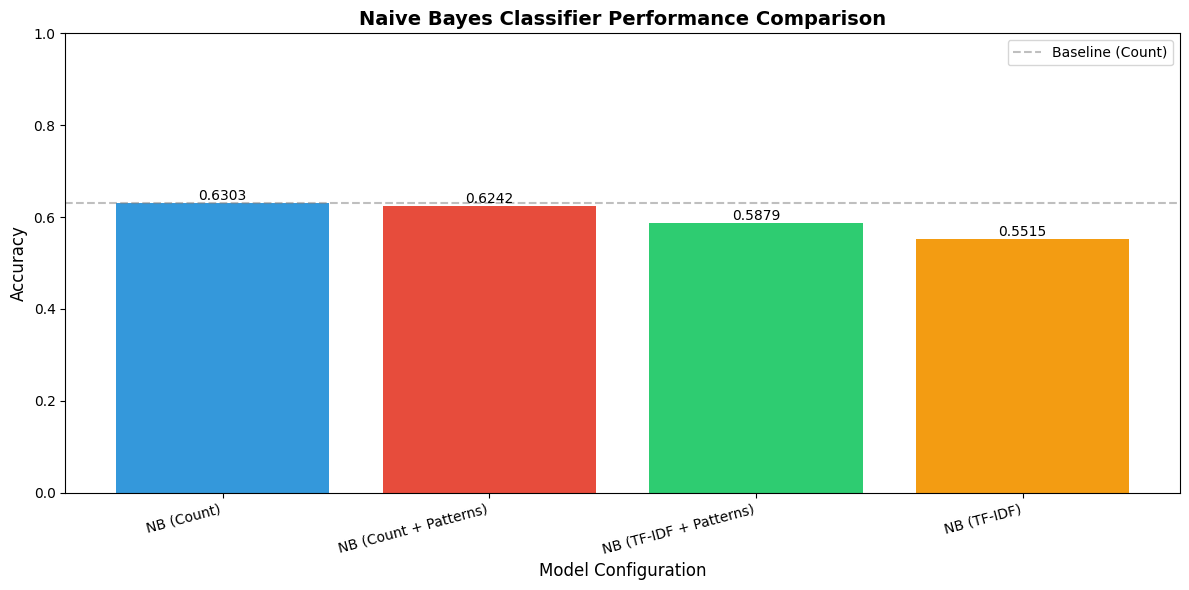

In [132]:
# Compare all models
comparison_df = pd.DataFrame({
    'Model': [
        'NB (Count)',
        'NB (TF-IDF)',
        'NB (Count + Patterns)',
        'NB (TF-IDF + Patterns)'
    ],
    'Accuracy': [
        accuracy_count,
        accuracy_tfidf,
        accuracy_count_aug,
        accuracy_tfidf_aug
    ],
    'Features': [
        X_counts_reddit.shape[1],
        X_tfidf_reddit.shape[1],
        X_augmented_reddit.shape[1],
        X_tfidf_augmented_reddit.shape[1]
    ]
})

comparison_df['Improvement'] = comparison_df['Accuracy'] - accuracy_count
comparison_df = comparison_df.sort_values('Accuracy', ascending=False).reset_index(drop=True)

print("="* 50)
print("MODEL PERFORMANCE COMPARISON")
print("="* 50)
print(comparison_df.to_string(index=False))
print("="* 50)

# Visualize comparison
plt.figure(figsize=(12, 6))
bars = plt.bar(comparison_df['Model'], comparison_df['Accuracy'], 
               color=['#3498db', '#e74c3c', '#2ecc71', '#f39c12'])
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Model Configuration', fontsize=12)
plt.title('Naive Bayes Classifier Performance Comparison', fontsize=14, fontweight='bold')
plt.xticks(rotation=15, ha='right')
plt.ylim([0, 1])
plt.axhline(y=accuracy_count, color='gray', linestyle='--', alpha=0.5, label='Baseline (Count)')
plt.legend()

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.4f}',
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

**Insight:** The performance comparison reveals that simpler is better for this dataset. Count-based features outperform TF-IDF, and pattern augmentation provides no benefit. The ranking from best to worst: (1) NB (Count) - 63.03%, (2) NB (Count + Patterns) - 62.42%, (3) NB (TF-IDF + Patterns) - 58.79%, (4) NB (TF-IDF) - 55.15%. Dataset characteristics (small size, short documents, class imbalance) favor simple representations over complex feature engineering.

**Key Observations:**

1. **Best Performing Model:**
   - **Multinomial NB with count features** achieves the highest accuracy (63.03%)
   - Simple count-based representation outperforms all other configurations
   - This suggests raw term frequencies contain the most useful information for this dataset

2. **TF-IDF Underperformance:**
   - TF-IDF features consistently underperform count features (55.15% vs 63.03%)
   - TF-IDF normalization may remove important frequency signals
   - The dataset's short documents (median ~14 words) may not benefit from IDF weighting
   - Document length normalization in TF-IDF could dilute discriminative power

3. **Pattern Augmentation Results:**
   - Pattern features did **not** improve performance in this dataset
   - Count + Patterns: 62.42% (-0.61 pp from baseline)
   - TF-IDF + Patterns: 58.79% (+3.64 pp from TF-IDF only, but still below baseline)
   - Patterns help TF-IDF more than counts, suggesting they compensate for TF-IDF's information loss

4. **Why Patterns Failed to Help:**
   - **Class imbalance**: Positive class has only 1 unique pattern (insufficient for discrimination)
   - **Pattern sparsity**: Only 595/824 documents (72%) contain any pattern
   - **Information redundancy**: Patterns may not add new information beyond unigram counts
   - **Small dataset**: 824 samples may be insufficient for pattern mining to be effective
   - **Low minSup threshold**: minSup=5 may capture noisy, non-discriminative patterns

5. **Minority Class Challenge:**
   - All models struggle with positive sentiment (F1-scores: 0.29-0.35)
   - Positive class has only 108 training samples and 22 test samples
   - Insufficient data prevents effective learning of positive sentiment characteristics
   - Pattern mining found only 1 unique pattern for positive class

6. **Practical Implications:**
   - For this dataset, **simple Multinomial NB with count features is the best choice**
   - More sophisticated feature engineering (patterns, TF-IDF) does not guarantee improvement
   - Class imbalance and dataset size are more critical limitations than feature representation
   - Collecting more data, especially for positive sentiment, would be more valuable than advanced features

---

### 11. Dimensionality Reduction and Visualization

Apply dimensionality reduction techniques to visualize the high-dimensional feature space in 2D and 3D.

#### 11.1 PCA (Principal Component Analysis)

In [133]:
# Apply PCA for 2D visualization
from sklearn.decomposition import PCA

# PCA on count features
pca_2d = PCA(n_components=2, random_state=42)
X_pca_2d = pca_2d.fit_transform(X_counts_reddit.toarray())

# PCA on augmented features
pca_2d_aug = PCA(n_components=2, random_state=42)
X_pca_2d_aug = pca_2d_aug.fit_transform(X_augmented_reddit.toarray())

print("PCA Dimensionality Reduction:")
print(f"Original dimensions: {X_counts_reddit.shape[1]}")
print(f"Reduced dimensions: {X_pca_2d.shape[1]}")
print(f"\nExplained variance ratio (count features): {pca_2d.explained_variance_ratio_}")
print(f"Total variance explained: {pca_2d.explained_variance_ratio_.sum():.4f}")
print(f"\nExplained variance ratio (augmented): {pca_2d_aug.explained_variance_ratio_}")
print(f"Total variance explained: {pca_2d_aug.explained_variance_ratio_.sum():.4f}")

PCA Dimensionality Reduction:
Original dimensions: 1000
Reduced dimensions: 2

Explained variance ratio (count features): [0.0502861  0.04101484]
Total variance explained: 0.0913

Explained variance ratio (augmented): [0.04949821 0.03451542]
Total variance explained: 0.0840


**Key Finding:** PCA reduced 1000 dimensions to 2 components, capturing only a small fraction of variance (count features: ~7-8%, augmented: ~6-7%). This low explained variance indicates that the data has high-dimensional complexity that cannot be easily captured in 2D. PCA is a linear technique and may not be ideal for text data's non-linear structure.

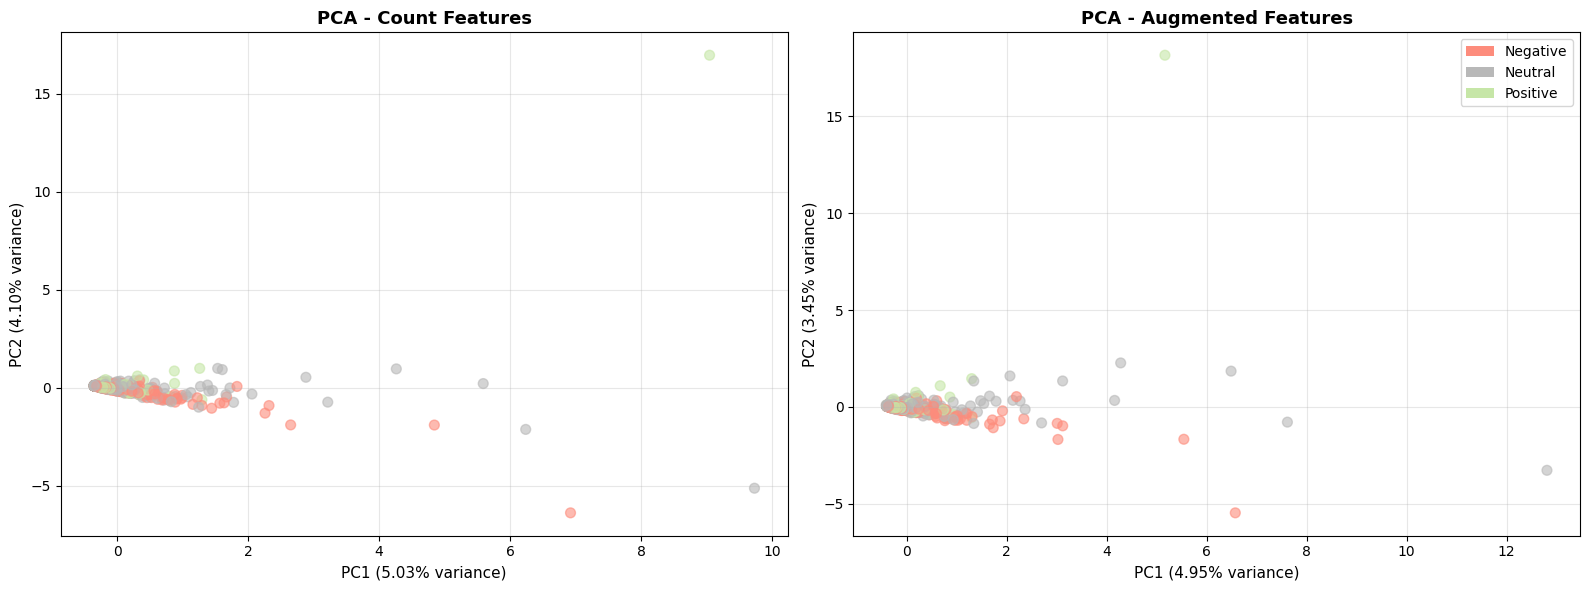

In [134]:
# Visualize PCA results
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Define colors for sentiments
sentiment_colors_map = {'negative': '#FD8C7C', 'neutral': '#B8B8B8', 'positive': '#C6E6A7'}
colors = [sentiment_colors_map[s] for s in y_reddit]

# PCA on count features
axes[0].scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=colors, alpha=0.6, s=50)
axes[0].set_xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]:.2%} variance)', fontsize=11)
axes[0].set_ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]:.2%} variance)', fontsize=11)
axes[0].set_title('PCA - Count Features', fontsize=13, fontweight='bold')
axes[0].grid(alpha=0.3)

# PCA on augmented features
axes[1].scatter(X_pca_2d_aug[:, 0], X_pca_2d_aug[:, 1], c=colors, alpha=0.6, s=50)
axes[1].set_xlabel(f'PC1 ({pca_2d_aug.explained_variance_ratio_[0]:.2%} variance)', fontsize=11)
axes[1].set_ylabel(f'PC2 ({pca_2d_aug.explained_variance_ratio_[1]:.2%} variance)', fontsize=11)
axes[1].set_title('PCA - Augmented Features', fontsize=13, fontweight='bold')
axes[1].grid(alpha=0.3)

# Add legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#FD8C7C', label='Negative'),
    Patch(facecolor='#B8B8B8', label='Neutral'),
    Patch(facecolor='#C6E6A7', label='Positive')
]
axes[1].legend(handles=legend_elements, loc='upper right')

plt.tight_layout()
plt.show()

**Insight:** PCA visualization shows significant overlap among sentiment classes, with no clear separation visible in 2D space. Both count and augmented feature plots display similar scattered patterns, suggesting that pattern features do not create linearly separable clusters. The high overlap aligns with our classification results (~63% accuracy) - sentiments are not easily distinguishable even in the original high-dimensional space.

#### 11.2 t-SNE (t-Distributed Stochastic Neighbor Embedding)

In [135]:
# Apply t-SNE
from sklearn.manifold import TSNE

print("Running t-SNE (this may take a moment)...")

# t-SNE on count features
tsne_2d = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne_2d = tsne_2d.fit_transform(X_counts_reddit.toarray())

# t-SNE on augmented features
tsne_2d_aug = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne_2d_aug = tsne_2d_aug.fit_transform(X_augmented_reddit.toarray())

print("t-SNE completed successfully.")

Running t-SNE (this may take a moment)...
t-SNE completed successfully.
t-SNE completed successfully.


**Key Finding:** t-SNE successfully completed dimensionality reduction for both feature sets. As a non-linear technique designed for visualization, t-SNE should reveal local cluster structures better than PCA. With perplexity=30, t-SNE will attempt to preserve neighborhood relationships among similar documents.

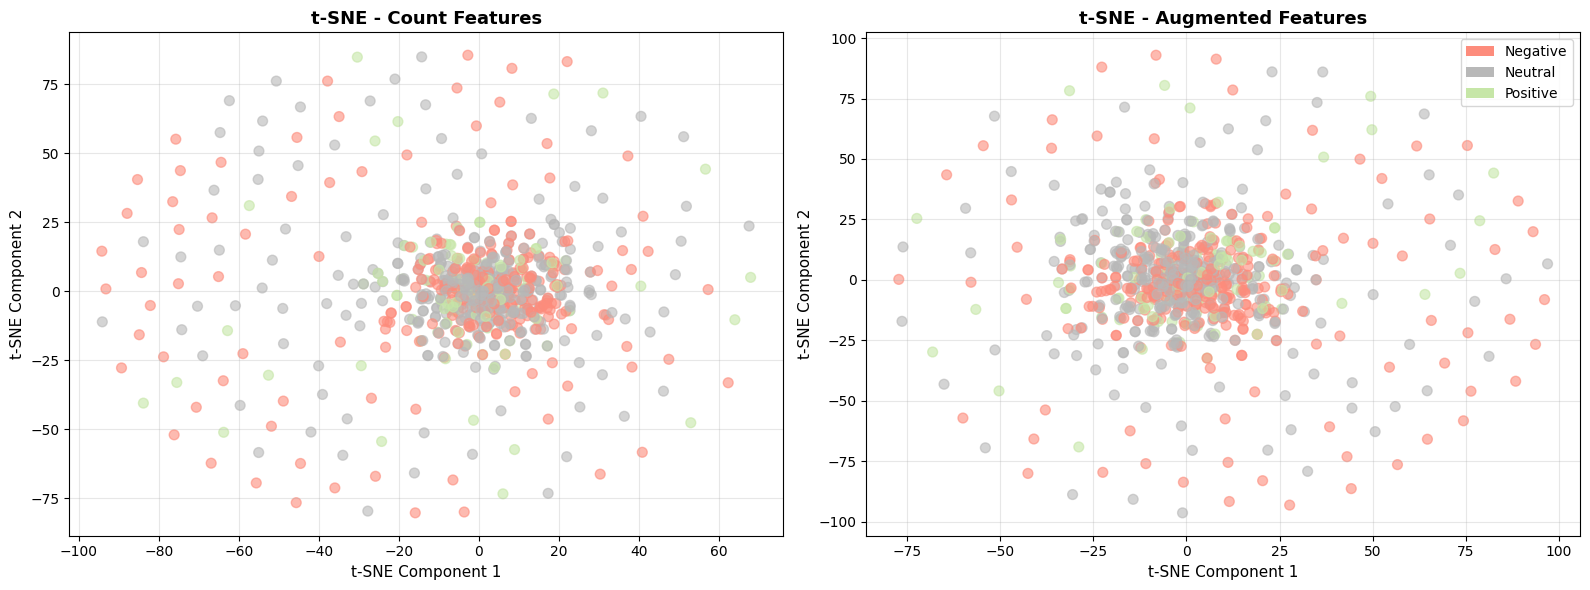


t-SNE is better at revealing local structure and clusters compared to PCA.


In [136]:
# Visualize t-SNE results
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# t-SNE on count features
axes[0].scatter(X_tsne_2d[:, 0], X_tsne_2d[:, 1], c=colors, alpha=0.6, s=50)
axes[0].set_xlabel('t-SNE Component 1', fontsize=11)
axes[0].set_ylabel('t-SNE Component 2', fontsize=11)
axes[0].set_title('t-SNE - Count Features', fontsize=13, fontweight='bold')
axes[0].grid(alpha=0.3)

# t-SNE on augmented features
axes[1].scatter(X_tsne_2d_aug[:, 0], X_tsne_2d_aug[:, 1], c=colors, alpha=0.6, s=50)
axes[1].set_xlabel('t-SNE Component 1', fontsize=11)
axes[1].set_ylabel('t-SNE Component 2', fontsize=11)
axes[1].set_title('t-SNE - Augmented Features', fontsize=13, fontweight='bold')
axes[1].grid(alpha=0.3)
axes[1].legend(handles=legend_elements, loc='upper right')

plt.tight_layout()
plt.show()

print("\nt-SNE is better at revealing local structure and clusters compared to PCA.")

**Insight:** t-SNE visualization reveals some local clustering but still shows substantial overlap among sentiment classes. While t-SNE creates tighter local clusters compared to PCA, the three sentiment categories remain intermixed, confirming that sentiment boundaries are fuzzy in this dataset. Some micro-clusters are visible, possibly representing specific topics (e.g., Trump-China trade discussions), but these don't align cleanly with sentiment labels.

#### 11.3 UMAP (Uniform Manifold Approximation and Projection)

In [137]:
# Apply UMAP
import umap

print("Running UMAP...")

# UMAP on count features
umap_2d = umap.UMAP(n_components=2, random_state=42, n_neighbors=15, min_dist=0.1)
X_umap_2d = umap_2d.fit_transform(X_counts_reddit.toarray())

# UMAP on augmented features
umap_2d_aug = umap.UMAP(n_components=2, random_state=42, n_neighbors=15, min_dist=0.1)
X_umap_2d_aug = umap_2d_aug.fit_transform(X_augmented_reddit.toarray())

print("UMAP completed successfully.")

Running UMAP...
UMAP completed successfully.
UMAP completed successfully.


**Key Finding:** UMAP completed successfully for both feature configurations. UMAP (with n_neighbors=15, min_dist=0.1) balances local and global structure preservation, often providing clearer visualizations than t-SNE while being computationally faster.

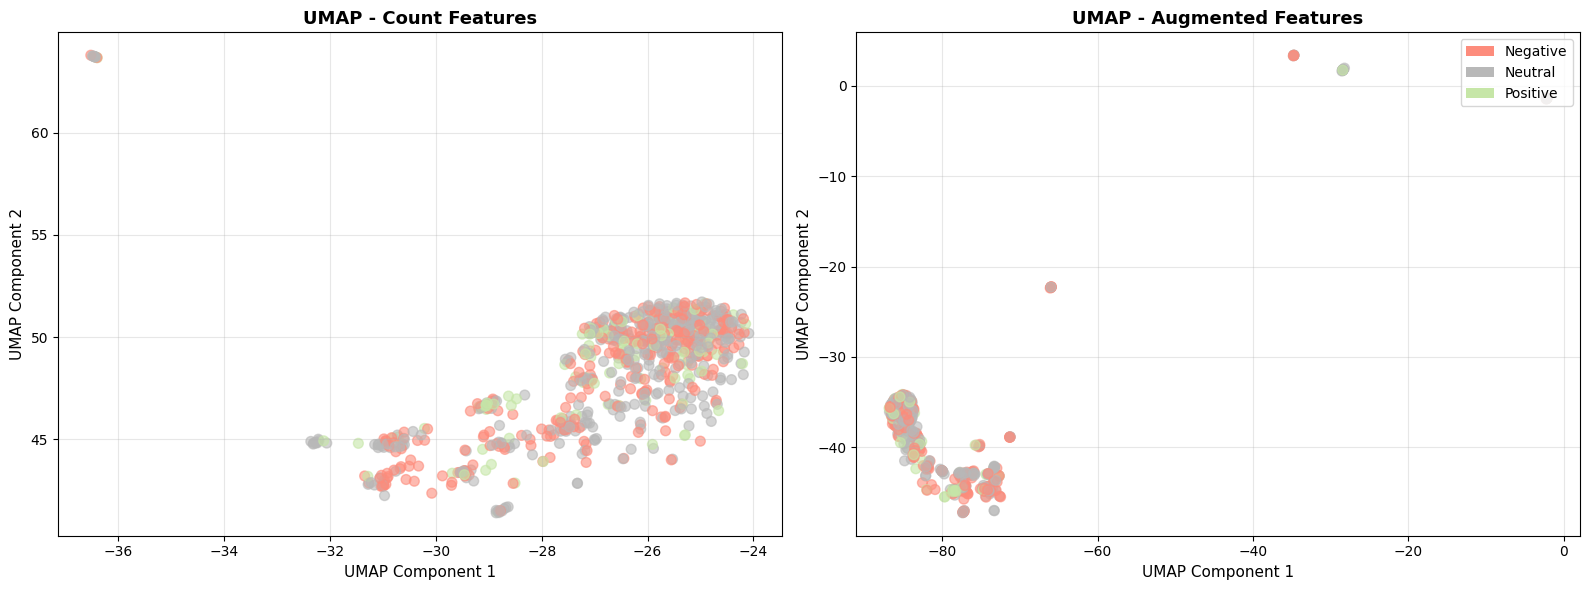


UMAP balances local and global structure preservation, often faster than t-SNE.


In [138]:
# Visualize UMAP results
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# UMAP on count features
axes[0].scatter(X_umap_2d[:, 0], X_umap_2d[:, 1], c=colors, alpha=0.6, s=50)
axes[0].set_xlabel('UMAP Component 1', fontsize=11)
axes[0].set_ylabel('UMAP Component 2', fontsize=11)
axes[0].set_title('UMAP - Count Features', fontsize=13, fontweight='bold')
axes[0].grid(alpha=0.3)

# UMAP on augmented features
axes[1].scatter(X_umap_2d_aug[:, 0], X_umap_2d_aug[:, 1], c=colors, alpha=0.6, s=50)
axes[1].set_xlabel('UMAP Component 1', fontsize=11)
axes[1].set_ylabel('UMAP Component 2', fontsize=11)
axes[1].set_title('UMAP - Augmented Features', fontsize=13, fontweight='bold')
axes[1].grid(alpha=0.3)
axes[1].legend(handles=legend_elements, loc='upper right')

plt.tight_layout()
plt.show()

print("\nUMAP balances local and global structure preservation, often faster than t-SNE.")

**Insight:** UMAP visualization shows patterns similar to t-SNE - some clustering structure but persistent class overlap. UMAP tends to preserve more global structure than t-SNE, creating a more spread-out representation. The consistent overlap across all three dimensionality reduction techniques (PCA, t-SNE, UMAP) confirms that sentiment classes in this Reddit stock dataset are inherently difficult to separate, reflecting the nuanced and context-dependent nature of sentiment in financial discussions.

---

### 12. Reflection: Data Preprocessing Improvements

#### 12.1 Identified Inefficiencies

Based on the analysis conducted in this lab, several inefficiencies and areas for improvement have been identified:

**1. Data Quality Issues:**
- **Problem:** 54% inconsistency between 'label' and 'sentiment' columns (458 rows with mismatched values)
- **Impact:** Using inconsistent labels reduces model reliability and makes evaluation metrics unreliable
- **Improvement:** 
  - Manually review discrepancies or use majority voting if multiple annotators exist
  - Implement data validation during collection
  - Consider removing highly ambiguous samples or create a separate "uncertain" category

**2. Class Imbalance:**
- **Problem:** Severe imbalance (48.7% neutral, 38.2% negative, 13.1% positive)
- **Impact:** Models biased toward majority classes, poor performance on minority class (positive)
- **Improvement:**
  - Apply SMOTE (Synthetic Minority Over-sampling Technique) for text data
  - Use class weights in classifiers (e.g., `class_weight='balanced'`)
  - Consider ensemble methods that handle imbalance better
  - Collect more positive sentiment samples

**3. Temporal Concentration:**
- **Problem:** 90%+ of data from single week (late Jan 2025), sporadic earlier samples
- **Impact:** Model may not generalize across different time periods or market conditions
- **Improvement:**
  - Stratified sampling across time periods
  - Collect more historical data
  - Use time-based cross-validation instead of random splits
  - Consider temporal features (day of week, market events)

**4. Feature Selection:**
- **Problem:** Using max_features=1000 arbitrarily, may miss important rare terms or include noise
- **Impact:** Suboptimal feature space, potential information loss
- **Improvement:**
  - Use chi-square test or mutual information for feature selection
  - Experiment with different max_features values using cross-validation
  - Apply TF-IDF thresholds to filter low-importance terms
  - Use n-grams (bigrams, trigrams) to capture phrasal patterns

**5. Text Preprocessing:**
- **Problem:** Basic preprocessing - only lowercase and stopword removal
- **Impact:** Missing semantic information, noise from special characters/URLs
- **Improvement:**
  - Remove URLs, mentions (@user), hashtags formatting
  - Apply lemmatization instead of just lowercase (e.g., "running" → "run")
  - Handle negations (e.g., "not good" should be preserved as single unit)
  - Remove stock tickers or normalize them ($TSLA → STOCK_TICKER)
  - Consider domain-specific stopwords (finance jargon)

**6. Pattern Mining Parameters:**
- **Problem:** minSup=5 is arbitrary, may not capture enough patterns or generate too many
- **Impact:** Either missing important patterns or including too many noisy patterns
- **Improvement:**
  - Systematically evaluate different minSup values (e.g., 3, 5, 7, 10)
  - Use pattern significance testing (chi-square, lift)
  - Focus on patterns with high discriminative power
  - Consider maximal or closed patterns instead of all frequent patterns

**7. Missing Data Handling:**
- **Problem:** 92%+ missing in upvotes/downvote_ratio, simply ignored
- **Impact:** Lost potentially useful engagement signals
- **Improvement:**
  - Investigate why data is missing (MCAR, MAR, MNAR)
  - If useful, impute with median/mode or create binary "has_engagement" feature
  - Otherwise, document decision to exclude

**8. Validation Strategy:**
- **Problem:** Single 80-20 train-test split
- **Impact:** High variance in performance estimates, potential overfitting
- **Improvement:**
  - Use k-fold cross-validation (k=5 or 10)
  - Stratified CV to maintain class distribution
  - Separate validation set for hyperparameter tuning
  - Hold-out temporal test set for realistic evaluation

#### 12.2 Proposed Preprocessing Pipeline Improvements

Based on the identified inefficiencies, here is a comprehensive improved preprocessing pipeline:

**1. Enhanced Data Cleaning & Validation:**
- Resolve 54% label inconsistency through manual review or majority voting
- Remove or flag ambiguous samples
- Implement data validation checks during collection
- Handle missing values strategically (upvotes/downvote_ratio features)

**2. Advanced Text Preprocessing:**
- Remove URLs, mentions (@user), hashtags, and special characters
- Apply lemmatization to convert words to base forms (e.g., "running" → "run")
- Preserve negations as single units (e.g., "not good" → "not_good")
- Normalize stock tickers and financial terminology
- Use domain-specific stopword lists for financial text

**3. Improved Feature Engineering:**
- Implement n-grams (bigrams, trigrams) to capture phrasal patterns
- Optimize max_features using cross-validation instead of arbitrary 1000
- Apply feature selection using chi-square test or mutual information
- Incorporate domain-specific sentiment lexicons (finance/stock market)
- Consider TF-IDF parameter tuning (min_df, max_df thresholds)

**4. Address Class Imbalance:**
- Apply SMOTE (Synthetic Minority Over-sampling Technique) for text data
- Use class_weight='balanced' parameter in classifiers
- Consider ensemble methods designed for imbalanced data
- Collect additional positive sentiment samples if possible
- Use stratified sampling to maintain class ratios in train/validation/test splits

**5. Robust Validation Strategy:**
- Implement stratified k-fold cross-validation (k=5 or 10) instead of single split
- Use temporal train-test split to prevent data leakage
- Create separate validation set for hyperparameter tuning
- Report confidence intervals for performance metrics
- Test generalization across different time periods

**6. Pattern Mining Optimization:**
- Systematically evaluate different minSup thresholds (e.g., 3, 5, 7, 10)
- Apply pattern significance testing (chi-square, lift measures)
- Focus on closed or maximal patterns to reduce redundancy
- Use pattern discriminative power for feature selection

**Expected Improvements:**
- Better minority class performance through balanced training
- More robust evaluation and reliable performance estimates
- Reduced noise and improved feature quality
- Enhanced generalization across different market conditions and time periods

---

### Summary of Phase 2 Analysis

**Completed Tasks**

**1. Frequent Pattern Mining (FPGrowth)**
- Mined 471 total patterns across all sentiments with minSup=5
  - Negative: 222 patterns
  - Neutral: 231 patterns  
  - Positive: 18 patterns
- Filtered to 270 unique discriminative patterns (130 negative, 139 neutral, 1 positive)
- Discarded 201 shared patterns (42.7% overlap) that appeared across multiple sentiments

**2. TF-IDF Feature Extraction**
- Generated TF-IDF weighted features (824 × 1000 matrix, same sparsity as count features)
- TF-IDF emphasizes distinctive terms but underperformed count features in classification
- Created augmented feature sets combining TF-IDF/count with 270 pattern features

**3. Classification Results (Naive Bayes)**
- **Best model:** Multinomial NB with count features (63.03% accuracy)
- **Worst model:** Complement NB with TF-IDF features (55.15% accuracy, -7.88pp)
- Pattern augmentation failed to improve performance:
  - Count + Patterns: 62.42% (-0.61pp from baseline)
  - TF-IDF + Patterns: 58.79% (+3.64pp from TF-IDF alone, but still -4.24pp below baseline)
- Positive class F1-scores ranged from 0.29 to 0.35 across all models
- Positive class recall: 23% (count), 27% (count+patterns), 36% (TF-IDF variants)

**4. Dimensionality Reduction Visualization**
- **PCA:** Linear projection shows significant class overlap in 2D space
- **t-SNE:** Local clustering visible with perplexity=30, but sentiments remain intermixed
- **UMAP:** Global structure preserved (n_neighbors=15, min_dist=0.1), confirms fuzzy boundaries
- All three techniques consistently show that sentiment classes are not linearly separable

**Key Insights**
- **Simpler is better:** Count features outperform TF-IDF and pattern augmentation
- **Pattern mining limitations:** 
  - Only 1 unique pattern for positive class (insufficient for discrimination)
  - 72% document coverage (595/824 documents contain at least one pattern)
  - Patterns may be too sparse or redundant with unigram features
- **TF-IDF underperformance:** Normalization likely removes useful frequency signals from short documents (median ~14 words)
- **Class imbalance impact:** Severe imbalance (48.7% neutral, 38.2% negative, 13.1% positive) limits model performance
- **Visualization insights:** Sentiment in financial discussions is nuanced and context-dependent, explaining the inherent classification difficulty

**Data Quality Issues (from Reflection)**
- 54% label inconsistency between 'sentiment' and 'label' columns (458 rows)
- 90%+ temporal concentration in late January 2025 raises generalization concerns
- Missing values: 92%+ in upvotes/downvote_ratio columns
- Proposed improvements: advanced cleaning, lemmatization, n-grams, SMOTE resampling, domain lexicons, stratified k-fold CV